# 6.2 EXPLORING RELATIONSHIPS
** **
**SCRIPT CONTENTS:**

      1) IMPORTING LIBRARIES & FILES
      2) DATA CLEANING
      3) EXPLORING DATA RELATIONSHIPS
         a) Correlations
         b) Scatterplots
         c) Pair Plots
         d) Categorical Plots
      4) QUESTIONS TO EXPLORE
         a) Current Questions
         b) New Questions to Explore
         c) Hypotheses
      5) EXPORTING FILES & VISUALIZATION CHARTS

## IMPORTING LIBRARIES & FILES
** **

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Checking matplotlib version

matplotlib.__version__

'3.5.2'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Document File Location

path = r'C:\Users\G\03-2023 The World Largest Public Companies (Pre-Post Pandemic)'

In [5]:
# Import files

# Merged Dataset
dfgwth = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Clean Global Public Companies Growth Rate1.csv'), index_col = False)

# USA Dataset
usa = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Aggregated USA.csv'), index_col = False)

# JAPAN Dataset
jpn = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Aggregated JAPAN.csv'), index_col = False)

# CHINA Dataset
chn = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Aggregated CHINA.csv'), index_col = False)

## DATA CLEANING
** **

The merged dataset is clean but will run some check points to verify consistency and detected any possible missed anomilies before proceeding to exploration analysis.

In [6]:
# Dataset dimension for all dataframes

# Create a list of data frames
dfs = (('MERGED', dfgwth), ('USA', usa), ('JAPAN', jpn), ('CHINA', chn))

# Iterate over the list and print the shape of each data frame
def printShapes(name, data):
    return f'Shape of {name} data: {data.shape}'

for name, data in dfs:
    print(printShapes(name, data))

Shape of MERGED data: (7023, 11)
Shape of USA data: (391, 11)
Shape of JAPAN data: (351, 11)
Shape of CHINA data: (299, 11)


In [7]:
# Check Column Names for all dataframes

# Create a list of data frames
dfs = (('MERGED', dfgwth), ('USA', usa), ('JAPAN', jpn), ('CHINA', chn))

# Iterate over the list and print the shape of each data frame
def printColumnNames(name, data):
    return f'Column Names in {name} data: {data.columns}'

for name, data in dfs:
    print(printColumnNames(name, data))

Column Names in MERGED data: Index(['Year', 'Country', 'Industry', 'Sales', 'Assets', 'Profits',
       'Market Value', 'Sales Growth', 'Assets Growth', 'Profits Growth',
       'Market Value Growth'],
      dtype='object')
Column Names in USA data: Index(['Year', 'Country', 'Industry', 'Sales', 'Assets', 'Profits',
       'Market Value', 'Sales Growth', 'Assets Growth', 'Profits Growth',
       'Market Value Growth'],
      dtype='object')
Column Names in JAPAN data: Index(['Year', 'Country', 'Industry', 'Sales', 'Assets', 'Profits',
       'Market Value', 'Sales Growth', 'Assets Growth', 'Profits Growth',
       'Market Value Growth'],
      dtype='object')
Column Names in CHINA data: Index(['Year', 'Country', 'Industry', 'Sales', 'Assets', 'Profits',
       'Market Value', 'Sales Growth', 'Assets Growth', 'Profits Growth',
       'Market Value Growth'],
      dtype='object')


In [8]:
# Check dataframe information for all dataframes

# Create a list of data frames
dfs = (('MERGED', dfgwth), ('USA', usa), ('JAPAN', jpn), ('CHINA', chn))

# Iterate over the list and print the shape of each data frame
def printDataInfo(name, data):
    return f'Data Info in {name} data: {data.info()}'

for name, data in dfs:
    print(printDataInfo(name, data))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7023 entries, 0 to 7022
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 7023 non-null   int64  
 1   Country              7023 non-null   object 
 2   Industry             7023 non-null   object 
 3   Sales                7023 non-null   int64  
 4   Assets               7023 non-null   int64  
 5   Profits              7023 non-null   int64  
 6   Market Value         7023 non-null   int64  
 7   Sales Growth         7023 non-null   float64
 8   Assets Growth        7023 non-null   float64
 9   Profits Growth       7023 non-null   float64
 10  Market Value Growth  7023 non-null   float64
dtypes: float64(4), int64(5), object(2)
memory usage: 603.7+ KB
Data Info in MERGED data: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 11 columns):
 #   Column               Non-Null Count  D

**No missing values** detected.

In [9]:
# Check dataframe heads for all dataframes

# Create a list of data frames
dfs = (('MERGED', dfgwth), ('USA', usa), ('JAPAN', jpn), ('CHINA', chn))


# Iterate over the list and print the data of each data frame
def printColumnHead(name, data):
    return f'Column Head of {name} data: {data.head(10)}'

for name, data in dfs:
    print(printColumnHead(name, data))

Column Head of MERGED data:    Year    Country                       Industry   Sales   Assets  Profits  \
0  2009  Australia                        Banking  135900  1772680    14100   
1  2009  Australia   Business Services & Supplies    4610     5640      690   
2  2009  Australia                      Chemicals    7470    12290      910   
3  2009  Australia                  Conglomerates   31870    35430     1000   
4  2009  Australia         Diversified Financials   58780   457940     1460   
5  2009  Australia          Drugs & Biotechnology    3400     4340      670   
6  2009  Australia                   Food Markets   54550    17570     1750   
7  2009  Australia          Food, Drink & Tobacco    7040    11170      380   
8  2009  Australia  Hotels, Restaurants & Leisure    1920     7100     3410   
9  2009  Australia                      Insurance   16950    51820     1030   

   Market Value  Sales Growth  Assets Growth  Profits Growth  \
0        101640      9.323466       6.

In [10]:
# Checking for Duplicate values for all dataframes

# Create a list of data frames
dfs = (('MERGED', dfgwth), ('USA', usa), ('JAPAN', jpn), ('CHINA', chn))

# Get the count of duplicate values for each row
duplicate_rows = data.duplicated() 

# Iterate over the list and print the duplicate values of each dataframe
def printDuplicateValues(name, data):
    print(f'Duplicate Values for {name} data:')
    print('Duplicate rows in {}:'.format(len(data[data.duplicated()])))
    print(duplicate_rows.sum())
    print('\n')
    
for name, data in dfs:
    print(printDuplicateValues(name, data))

Duplicate Values for MERGED data:
Duplicate rows in 0:
0


None
Duplicate Values for USA data:
Duplicate rows in 0:
0


None
Duplicate Values for JAPAN data:
Duplicate rows in 0:
0


None
Duplicate Values for CHINA data:
Duplicate rows in 0:
0


None


**No duplicates** found.

In [11]:
# Checking for Data Types for all dataframes

# Create a list of data frames
dfs = (('MERGED', dfgwth), ('USA', usa), ('JAPAN', jpn), ('CHINA', chn))

# Iterate over the list and print the data types of each data frame
def printDataTypes(name, data):
    return f'Data Types of {name} data: \n{data.dtypes}\n'

for name, data in dfs:
    print(printDataTypes(name, data))

Data Types of MERGED data: 
Year                     int64
Country                 object
Industry                object
Sales                    int64
Assets                   int64
Profits                  int64
Market Value             int64
Sales Growth           float64
Assets Growth          float64
Profits Growth         float64
Market Value Growth    float64
dtype: object

Data Types of USA data: 
Year                     int64
Country                 object
Industry                object
Sales                    int64
Assets                   int64
Profits                  int64
Market Value             int64
Sales Growth           float64
Assets Growth          float64
Profits Growth         float64
Market Value Growth    float64
dtype: object

Data Types of JAPAN data: 
Year                     int64
Country                 object
Industry                object
Sales                    int64
Assets                   int64
Profits                  int64
Market Value          

**No mixed-type data** found.

In [12]:
# Count number of companies by Country for all dataframes

# Create a list of data frames
dfs = (('MERGED', dfgwth), ('USA', usa), ('JAPAN', jpn), ('CHINA', chn))

pd.options.display.max_rows = None

# Function to get value counts and return as a dictionary
def getValueCounts(data):
    return data['Country'].value_counts()

# Dictionary to store value counts for each data frame
value_counts_dict = {}

# Iterate over the list and get value counts for each data frame
for name, data in dfs:
    value_counts_dict[name] = getValueCounts(data)

# Print the value counts for each data frame
for name, value_counts in value_counts_dict.items():
    print(f'Number of Companies by Country for {name} data:')
    print(value_counts)
    print('\n')

Number of Companies by Country for MERGED data:
United States of America    391
Japan                       351
United Kingdom              336
France                      323
China                       299
Germany                     285
Canada                      278
South Korea                 261
Switzerland                 249
Hong Kong                   243
Australia                   212
Netherlands                 208
India                       197
Brazil                      183
Taiwan                      181
Ireland                     179
Sweden                      154
Italy                       154
Spain                       149
Singapore                   132
South Africa                121
Finland                     120
Malaysia                    113
Belgium                     113
Mexico                      111
Russia                      107
Norway                      105
Denmark                     104
Thailand                     95
Saudi Arabia            

In [13]:
# Checking MERGED statistical description for variables with numerical values

dfgwth.describe(include = 'all')

Year                   Country Industry         Sales  \
count   7023.000000                      7023     7023  7.023000e+03   
unique          NaN                        71       31           NaN   
top             NaN  United States of America  Banking           NaN   
freq            NaN                       391      745           NaN   
mean    2015.444397                       NaN      NaN  7.448891e+04   
std        3.970986                       NaN      NaN  1.637607e+05   
min     2009.000000                       NaN      NaN -6.620000e+03   
25%     2012.000000                       NaN      NaN  8.273000e+03   
50%     2015.000000                       NaN      NaN  2.066900e+04   
75%     2019.000000                       NaN      NaN  6.616400e+04   
max     2022.000000                       NaN      NaN  2.466591e+06   

              Assets        Profits  Market Value  Sales Growth  \
count   7.023000e+03    7023.000000  7.023000e+03   7023.000000   
unique           NaN            NaN           NaN           NaN   
top              NaN            NaN           NaN           NaN   
freq             NaN            NaN           NaN           NaN   
mean    3.380132e+05    5465.284209  9.503052e+04     27.506638   
std     1.394220e+06   16039.152523  2.691775e+05    427.255877   
min     8.520000e+02  -92720.000000  1.790000e+02   -425.185185   
25%     1.606550e+04     527.000000  1.035800e+04     -7.163899   
50%     4.501800e+04    1360.000000  2.562900e+04      3.256265   
75%     1.646855e+05    4301.500000  7.197600e+04     16.460431   
max     3.616723e+07  296065.000000  7.091153e+06  29378.125000   

        Assets Growth  Profits Growth  Market Value Growth  
count     7023.000000    7.023000e+03          7023.000000  
unique            NaN             NaN                  NaN  
top               NaN             NaN                  NaN  
freq              NaN             NaN                  NaN  
mean        27.851355             inf            35.142986  
std        300.821157             NaN           503.526504  
min        -99.769076   -3.015000e+04           -98.703219  
25%         -3.579653   -3.333333e+01           -17.799066  
50%          4.838710    1.295896e+00             4.057089  
75%         16.558869    3.315026e+01            29.383617  
max      14993.617674             inf         35079.891418

## EXPLORING RELATIONSHIP
** **

Using the three subsets to find correlationship between the weighted variables.

### a) Correlations

**COEFFICIENT SCALE:**

        0    : No relationship
    0.1 - 0.3: Weak relationship
    0.3 - 0.5: Moderate relationship
    0.5 - 1.0: Strong relationship

In [14]:
# Checking USA statistical description for variables with numerical values

usa.describe(include = 'all')

Year                   Country             Industry  \
count    391.000000                       391                  391   
unique          NaN                         1                   31   
top             NaN  United States of America  Aerospace & Defense   
freq            NaN                       391                   14   
mean    2015.516624                       NaN                  NaN   
std        3.905828                       NaN                  NaN   
min     2009.000000                       NaN                  NaN   
25%     2012.000000                       NaN                  NaN   
50%     2016.000000                       NaN                  NaN   
75%     2019.000000                       NaN                  NaN   
max     2022.000000                       NaN                  NaN   

               Sales        Assets        Profits  Market Value  Sales Growth  \
count   3.910000e+02  3.910000e+02     391.000000  3.910000e+02    391.000000   
unique           NaN           NaN            NaN           NaN           NaN   
top              NaN           NaN            NaN           NaN           NaN   
freq             NaN           NaN            NaN           NaN           NaN   
mean    4.215937e+05  1.415285e+06   34327.007673  7.439755e+05      8.624009   
std     3.874801e+05  2.674280e+06   39330.291052  8.067783e+05     63.892749   
min     1.452900e+04  1.497000e+03  -92720.000000  8.800000e+02    -83.007371   
25%     1.716910e+05  2.158350e+05    8873.000000  2.081855e+05     -3.262947   
50%     3.111880e+05  5.753370e+05   25330.000000  5.039230e+05      3.763484   
75%     5.270700e+05  9.774270e+05   50892.500000  1.010570e+06     11.216410   
max     2.466591e+06  1.563153e+07  281591.000000  7.091153e+06   1142.885734   

        Assets Growth  Profits Growth  Market Value Growth  
count      391.000000      391.000000           391.000000  
unique            NaN             NaN                  NaN  
top               NaN             NaN                  NaN  
freq              NaN             NaN                  NaN  
mean        21.913366       66.553644            34.749685  
std        247.510579      912.175977           445.463198  
min        -66.724936    -2073.120301           -71.741652  
25%         -0.602979      -20.789850            -3.769985  
50%          4.058733        4.483717            10.888516  
75%         11.099935       28.920915            25.207123  
max       4710.598802    12593.333333          8796.136364

In [15]:
# Checking CHINA statistical description for variables with numerical values

chn.describe(include = 'all')

Year Country Industry         Sales        Assets  \
count    299.000000     299      299  2.990000e+02  2.990000e+02   
unique          NaN       1       29           NaN           NaN   
top             NaN   China  Banking           NaN           NaN   
freq            NaN     299       14           NaN           NaN   
mean    2016.006689     NaN      NaN  1.864901e+05  1.197446e+06   
std        3.950188     NaN      NaN  2.850126e+05  4.476049e+06   
min     2009.000000     NaN      NaN  4.400000e+02  1.110000e+03   
25%     2013.000000     NaN      NaN  2.605950e+04  3.700050e+04   
50%     2016.000000     NaN      NaN  7.099000e+04  1.268530e+05   
75%     2019.000000     NaN      NaN  2.185165e+05  4.300525e+05   
max     2022.000000     NaN      NaN  1.840093e+06  3.616723e+07   

              Profits  Market Value  Sales Growth  Assets Growth  \
count      299.000000  2.990000e+02    299.000000     299.000000   
unique            NaN           NaN           NaN            NaN   
top               NaN           NaN           NaN            NaN   
freq              NaN           NaN           NaN            NaN   
mean     17103.026756  2.122333e+05     66.940594      56.006184   
std      41448.097556  2.896580e+05    444.628663     213.376447   
min       -921.000000  1.213000e+03    -97.278727     -91.939471   
25%       1190.000000  3.670500e+04      4.950177       8.492977   
50%       4852.000000  1.059130e+05     20.295618      22.285175   
75%      14623.500000  2.681130e+05     48.626554      45.789285   
max     296065.000000  1.612252e+06   7463.122564    2791.286210   

        Profits Growth  Market Value Growth  
count       299.000000           299.000000  
unique             NaN                  NaN  
top                NaN                  NaN  
freq               NaN                  NaN  
mean         89.091280            58.051672  
std         458.593720           355.070149  
min       -2120.304017           -98.703219  
25%          -7.796623           -16.293431  
50%          20.796943             7.016058  
75%          69.610497            46.629186  
max        4246.034483          5559.863774

In [16]:
# Checking JAPAN statistical description for variables with numerical values

jpn.describe(include = 'all')

Year Country Industry         Sales        Assets  \
count    351.000000     351      351  3.510000e+02  3.510000e+02   
unique          NaN       1       28           NaN           NaN   
top             NaN   Japan  Banking           NaN           NaN   
freq            NaN     351       14           NaN           NaN   
mean    2015.518519     NaN      NaN  1.761697e+05  7.379061e+05   
std        3.956777     NaN      NaN  2.285991e+05  1.951535e+06   
min     2009.000000     NaN      NaN  1.572000e+03  1.193000e+03   
25%     2012.000000     NaN      NaN  4.804050e+04  6.142100e+04   
50%     2016.000000     NaN      NaN  1.389280e+05  1.823990e+05   
75%     2019.000000     NaN      NaN  1.957375e+05  4.270430e+05   
max     2022.000000     NaN      NaN  1.361797e+06  1.246187e+07   

             Profits  Market Value  Sales Growth  Assets Growth  \
count     351.000000  3.510000e+02    351.000000     351.000000   
unique           NaN           NaN           NaN            NaN   
top              NaN           NaN           NaN            NaN   
freq             NaN           NaN           NaN            NaN   
mean     7385.364672  1.202747e+05      9.130027      13.307486   
std     11755.645205  1.532069e+05     69.213081      83.737219   
min    -19580.000000  2.320000e+03    -92.997100     -92.922565   
25%      1307.500000  3.922550e+04     -8.400717      -4.908235   
50%      4211.000000  7.467300e+04      2.047778       3.930704   
75%      8714.000000  1.368990e+05     13.562158      13.495009   
max     78665.000000  1.063581e+06    941.498439    1298.858268   

        Profits Growth  Market Value Growth  
count       351.000000           351.000000  
unique             NaN                  NaN  
top                NaN                  NaN  
freq               NaN                  NaN  
mean               inf            15.257290  
std                NaN           100.803301  
min       -4425.000000           -92.409234  
25%         -36.497201           -11.634103  
50%           1.470588             2.710039  
75%          36.384214            18.975646  
max                inf          1443.491379

In [17]:
# GLOBAL 
# Create a correlation matrix using pandas

dfgwth.corr()

Year     Sales    Assets   Profits  Market Value  \
Year                 1.000000  0.055290  0.049271  0.087690      0.117911   
Sales                0.055290  1.000000  0.455877  0.714528      0.731316   
Assets               0.049271  0.455877  1.000000  0.667179      0.414701   
Profits              0.087690  0.714528  0.667179  1.000000      0.783419   
Market Value         0.117911  0.731316  0.414701  0.783419      1.000000   
Sales Growth         0.004960  0.002128 -0.007674  0.007096      0.000160   
Assets Growth        0.006376  0.002521  0.000534  0.013766      0.004563   
Profits Growth       0.020360  0.014711  0.009100  0.043862      0.031349   
Market Value Growth  0.021250  0.015786 -0.002867  0.053980      0.062032   

                     Sales Growth  Assets Growth  Profits Growth  \
Year                     0.004960       0.006376        0.020360   
Sales                    0.002128       0.002521        0.014711   
Assets                  -0.007674       0.000534        0.009100   
Profits                  0.007096       0.013766        0.043862   
Market Value             0.000160       0.004563        0.031349   
Sales Growth             1.000000       0.312891        0.084127   
Assets Growth            0.312891       1.000000        0.149794   
Profits Growth           0.084127       0.149794        1.000000   
Market Value Growth      0.157985       0.254347        0.442187   

                     Market Value Growth  
Year                            0.021250  
Sales                           0.015786  
Assets                         -0.002867  
Profits                         0.053980  
Market Value                    0.062032  
Sales Growth                    0.157985  
Assets Growth                   0.254347  
Profits Growth                  0.442187  
Market Value Growth             1.000000

In [18]:
# USA
# Create a correlation matrix using pandas

usa.corr()

Year     Sales    Assets   Profits  Market Value  \
Year                 1.000000  0.141218  0.103960  0.287645      0.399217   
Sales                0.141218  1.000000  0.271797  0.564448      0.629011   
Assets               0.103960  0.271797  1.000000  0.532398      0.350549   
Profits              0.287645  0.564448  0.532398  1.000000      0.769956   
Market Value         0.399217  0.629011  0.350549  0.769956      1.000000   
Sales Growth         0.094431 -0.002486 -0.025083  0.024859     -0.010703   
Assets Growth        0.063919 -0.022415  0.000002 -0.013316     -0.024267   
Profits Growth       0.053221 -0.049642 -0.029345 -0.037044     -0.050715   
Market Value Growth  0.053041 -0.028340 -0.021909 -0.033618     -0.031512   

                     Sales Growth  Assets Growth  Profits Growth  \
Year                     0.094431       0.063919        0.053221   
Sales                   -0.002486      -0.022415       -0.049642   
Assets                  -0.025083       0.000002       -0.029345   
Profits                  0.024859      -0.013316       -0.037044   
Market Value            -0.010703      -0.024267       -0.050715   
Sales Growth             1.000000       0.925501        0.614012   
Assets Growth            0.925501       1.000000        0.668612   
Profits Growth           0.614012       0.668612        1.000000   
Market Value Growth      0.908631       0.965309        0.692454   

                     Market Value Growth  
Year                            0.053041  
Sales                          -0.028340  
Assets                         -0.021909  
Profits                        -0.033618  
Market Value                   -0.031512  
Sales Growth                    0.908631  
Assets Growth                   0.965309  
Profits Growth                  0.692454  
Market Value Growth             1.000000

In [19]:
# CHINA
# Create a correlation matrix using pandas

chn.corr()

Year     Sales    Assets   Profits  Market Value  \
Year                 1.000000  0.255957  0.116896  0.139571      0.224926   
Sales                0.255957  1.000000  0.675215  0.760564      0.675896   
Assets               0.116896  0.675215  1.000000  0.972022      0.770091   
Profits              0.139571  0.760564  0.972022  1.000000      0.836589   
Market Value         0.224926  0.675896  0.770091  0.836589      1.000000   
Sales Growth         0.004789  0.004506 -0.024053 -0.006287     -0.016185   
Assets Growth       -0.052398 -0.040183 -0.041739 -0.031325     -0.028272   
Profits Growth      -0.068221 -0.040468 -0.038306 -0.036101     -0.073195   
Market Value Growth  0.044737 -0.008126 -0.031577 -0.013696      0.004911   

                     Sales Growth  Assets Growth  Profits Growth  \
Year                     0.004789      -0.052398       -0.068221   
Sales                    0.004506      -0.040183       -0.040468   
Assets                  -0.024053      -0.041739       -0.038306   
Profits                 -0.006287      -0.031325       -0.036101   
Market Value            -0.016185      -0.028272       -0.073195   
Sales Growth             1.000000       0.861495        0.569299   
Assets Growth            0.861495       1.000000        0.569136   
Profits Growth           0.569299       0.569136        1.000000   
Market Value Growth      0.936959       0.894297        0.595314   

                     Market Value Growth  
Year                            0.044737  
Sales                          -0.008126  
Assets                         -0.031577  
Profits                        -0.013696  
Market Value                    0.004911  
Sales Growth                    0.936959  
Assets Growth                   0.894297  
Profits Growth                  0.595314  
Market Value Growth             1.000000

In [20]:
# JAPAN
# Create a correlation matrix using pandas

jpn.corr()

Year     Sales    Assets   Profits  Market Value  \
Year                 1.000000  0.004409  0.069564  0.201617      0.138924   
Sales                0.004409  1.000000  0.174935  0.720925      0.878633   
Assets               0.069564  0.174935  1.000000  0.438142      0.317713   
Profits              0.201617  0.720925  0.438142  1.000000      0.799691   
Market Value         0.138924  0.878633  0.317713  0.799691      1.000000   
Sales Growth         0.034022  0.005291 -0.031582  0.002610     -0.023578   
Assets Growth        0.061189 -0.003343 -0.011611 -0.010348     -0.015139   
Profits Growth       0.075226  0.055754  0.012234  0.110777      0.056230   
Market Value Growth  0.096652 -0.033324 -0.044886 -0.055491      0.001435   

                     Sales Growth  Assets Growth  Profits Growth  \
Year                     0.034022       0.061189        0.075226   
Sales                    0.005291      -0.003343        0.055754   
Assets                  -0.031582      -0.011611        0.012234   
Profits                  0.002610      -0.010348        0.110777   
Market Value            -0.023578      -0.015139        0.056230   
Sales Growth             1.000000       0.933371        0.203335   
Assets Growth            0.933371       1.000000        0.207597   
Profits Growth           0.203335       0.207597        1.000000   
Market Value Growth      0.838586       0.876966        0.203242   

                     Market Value Growth  
Year                            0.096652  
Sales                          -0.033324  
Assets                         -0.044886  
Profits                        -0.055491  
Market Value                    0.001435  
Sales Growth                    0.838586  
Assets Growth                   0.876966  
Profits Growth                  0.203242  
Market Value Growth             1.000000

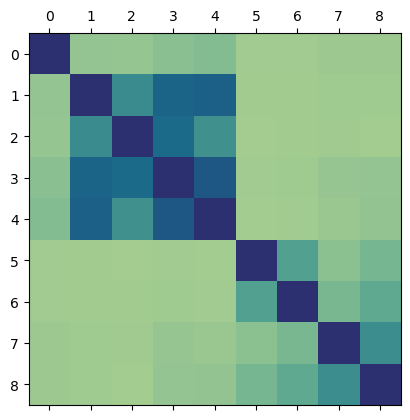

In [21]:
# Create a GLOBAL  correlation heatmap

plt.matshow(dfgwth.corr(), cmap = 'crest')
plt.show()

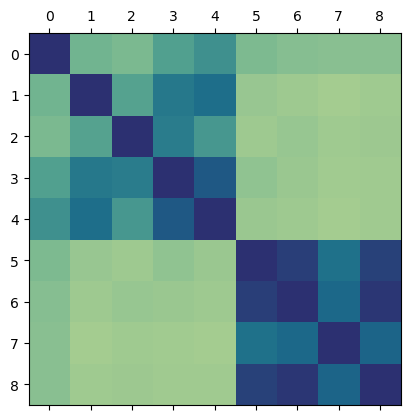

In [22]:
# Create a USA correlation heatmap

plt.matshow(usa.corr(), cmap = 'crest')
plt.show()

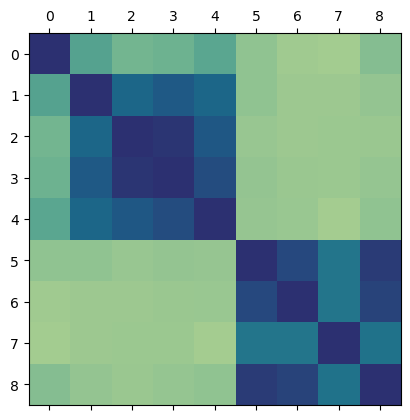

In [23]:
# Create a CHINA correlation heatmap

plt.matshow(chn.corr(), cmap = 'crest')
plt.show()

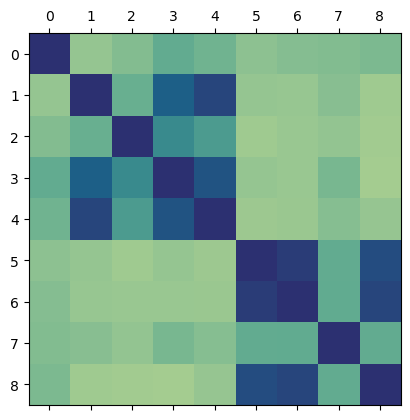

In [24]:
# Create a JAPAN correlation heatmap

plt.matshow(jpn.corr(), cmap = 'crest')
plt.show()

**NOTE:** Using all variables to determine correlations with heatmap doesn't clearly show a definite relationships.

In [25]:
# GLOBAL
# Creating a subset of the data to check for correlations and Check Output

dfgwth_hm = dfgwth[['Sales', 'Profits', 'Assets', 'Market Value', 'Sales Growth', 'Profits Growth', 'Assets Growth', 'Market Value Growth']]
dfgwth_hm.head()

Sales  Profits   Assets  Market Value  Sales Growth  Profits Growth  \
0  135900    14100  1772680        101640      9.323466      -10.702977   
1    4610      690     5640          4090     14.392060      -46.511628   
2    7470      910    12290          5280     52.448980      111.627907   
3   31870     1000    35430         12960    288.185140       49.253731   
4   58780     1460   457940         39550     11.389047      -88.795088   

   Assets Growth  Market Value Growth  
0       6.317848           -46.676460  
1      12.574850           -70.405210  
2     131.886792           -37.588652  
3     245.321637           -32.675325  
4       6.947850           -67.897727

In [26]:
# USA Subset 
# Creating a subset of the data to check for correlations and Check Output

usa_hm = usa[['Sales', 'Profits', 'Assets', 'Market Value', 'Sales Growth', 'Profits Growth', 'Assets Growth', 'Market Value Growth']]
usa_hm.head()

Sales  Profits   Assets  Market Value  Sales Growth  Profits Growth  \
0  238040    12810   210110        127690      8.042847      -21.362799   
1  513980   -21010  9504850        307770    -27.258060     -131.158238   
2  143540     5300   217720        102850    -17.301377      -41.885965   
3  195700    13210   206730         82840     -0.553890      -14.664083   
4  215670    15290   210370        153590     18.944408       11.850768   

   Assets Growth  Market Value Growth  
0       4.061215           -46.326187  
1      -0.264113           -66.858700  
2     -14.733297           -39.976656  
3       3.370169           -61.601928  
4       8.215021           -48.890220

In [27]:
# CHINA Subset 
# Creating a subset of the data to check for correlations and Check Output

chn_hm = chn[['Sales', 'Profits', 'Assets', 'Market Value', 'Sales Growth', 'Profits Growth', 'Assets Growth', 'Market Value Growth']]
chn_hm.head()

Sales  Profits   Assets  Market Value  Sales Growth  Profits Growth  \
0  190570    38480  4080650        551180     44.931173       69.440775   
1   40390     2810    48660         44470    287.619962      279.729730   
2   70530     1820    77060         54780     96.353007      111.627907   
3   28540     1660    29290         17060     85.686402      124.324324   
4   19440     6360    86560         69160    176.923077      297.500000   

   Assets Growth  Market Value Growth  
0      29.436375           -37.555372  
1     295.609756             1.252277  
2     109.402174           -32.958022  
3      48.831301           -58.145240  
4     206.298655           -39.492563

In [28]:
# JAPAN Subset 
# Creating a subset of the data to check for correlations and Check Output

jpn_hm = jpn[['Sales', 'Profits', 'Assets', 'Market Value', 'Sales Growth', 'Profits Growth', 'Assets Growth', 'Market Value Growth']]
jpn_hm.head()

Sales  Profits   Assets  Market Value  Sales Growth  Profits Growth  \
0  240480    25270  7827160        218750     27.224632      -15.766667   
1   57690     2370   114430         31190     83.434022       13.942308   
2  232450    11030   244660         86760     29.664751       37.189055   
3  170670     7740   170600         56350     42.498121       35.789474   
4    9610      240     7620          2320     21.954315        9.090909   

   Assets Growth  Market Value Growth  
0      18.318512           -40.848003  
1      73.826523           -23.852539  
2      24.060646           -44.281035  
3      39.185771           -32.385409  
4       2.281879           -37.801609

In [29]:
# GLOBAL
# Create a correlation matrix using pandas

dfgwth_hm.corr()

Sales   Profits    Assets  Market Value  Sales Growth  \
Sales                1.000000  0.714528  0.455877      0.731316      0.002128   
Profits              0.714528  1.000000  0.667179      0.783419      0.007096   
Assets               0.455877  0.667179  1.000000      0.414701     -0.007674   
Market Value         0.731316  0.783419  0.414701      1.000000      0.000160   
Sales Growth         0.002128  0.007096 -0.007674      0.000160      1.000000   
Profits Growth       0.014711  0.043862  0.009100      0.031349      0.084127   
Assets Growth        0.002521  0.013766  0.000534      0.004563      0.312891   
Market Value Growth  0.015786  0.053980 -0.002867      0.062032      0.157985   

                     Profits Growth  Assets Growth  Market Value Growth  
Sales                      0.014711       0.002521             0.015786  
Profits                    0.043862       0.013766             0.053980  
Assets                     0.009100       0.000534            -0.002867  
Market Value               0.031349       0.004563             0.062032  
Sales Growth               0.084127       0.312891             0.157985  
Profits Growth             1.000000       0.149794             0.442187  
Assets Growth              0.149794       1.000000             0.254347  
Market Value Growth        0.442187       0.254347             1.000000

In [30]:
# USA Subset
# Create a correlation matrix using pandas

usa_hm.corr()

Sales   Profits    Assets  Market Value  Sales Growth  \
Sales                1.000000  0.564448  0.271797      0.629011     -0.002486   
Profits              0.564448  1.000000  0.532398      0.769956      0.024859   
Assets               0.271797  0.532398  1.000000      0.350549     -0.025083   
Market Value         0.629011  0.769956  0.350549      1.000000     -0.010703   
Sales Growth        -0.002486  0.024859 -0.025083     -0.010703      1.000000   
Profits Growth      -0.049642 -0.037044 -0.029345     -0.050715      0.614012   
Assets Growth       -0.022415 -0.013316  0.000002     -0.024267      0.925501   
Market Value Growth -0.028340 -0.033618 -0.021909     -0.031512      0.908631   

                     Profits Growth  Assets Growth  Market Value Growth  
Sales                     -0.049642      -0.022415            -0.028340  
Profits                   -0.037044      -0.013316            -0.033618  
Assets                    -0.029345       0.000002            -0.021909  
Market Value              -0.050715      -0.024267            -0.031512  
Sales Growth               0.614012       0.925501             0.908631  
Profits Growth             1.000000       0.668612             0.692454  
Assets Growth              0.668612       1.000000             0.965309  
Market Value Growth        0.692454       0.965309             1.000000

In [31]:
# CHINA Subset
# Create a correlation matrix using pandas

chn_hm.corr()

Sales   Profits    Assets  Market Value  Sales Growth  \
Sales                1.000000  0.760564  0.675215      0.675896      0.004506   
Profits              0.760564  1.000000  0.972022      0.836589     -0.006287   
Assets               0.675215  0.972022  1.000000      0.770091     -0.024053   
Market Value         0.675896  0.836589  0.770091      1.000000     -0.016185   
Sales Growth         0.004506 -0.006287 -0.024053     -0.016185      1.000000   
Profits Growth      -0.040468 -0.036101 -0.038306     -0.073195      0.569299   
Assets Growth       -0.040183 -0.031325 -0.041739     -0.028272      0.861495   
Market Value Growth -0.008126 -0.013696 -0.031577      0.004911      0.936959   

                     Profits Growth  Assets Growth  Market Value Growth  
Sales                     -0.040468      -0.040183            -0.008126  
Profits                   -0.036101      -0.031325            -0.013696  
Assets                    -0.038306      -0.041739            -0.031577  
Market Value              -0.073195      -0.028272             0.004911  
Sales Growth               0.569299       0.861495             0.936959  
Profits Growth             1.000000       0.569136             0.595314  
Assets Growth              0.569136       1.000000             0.894297  
Market Value Growth        0.595314       0.894297             1.000000

In [32]:
# JAPAN Subset
# Create a correlation matrix using pandas

jpn_hm.corr()

Sales   Profits    Assets  Market Value  Sales Growth  \
Sales                1.000000  0.720925  0.174935      0.878633      0.005291   
Profits              0.720925  1.000000  0.438142      0.799691      0.002610   
Assets               0.174935  0.438142  1.000000      0.317713     -0.031582   
Market Value         0.878633  0.799691  0.317713      1.000000     -0.023578   
Sales Growth         0.005291  0.002610 -0.031582     -0.023578      1.000000   
Profits Growth       0.055754  0.110777  0.012234      0.056230      0.203335   
Assets Growth       -0.003343 -0.010348 -0.011611     -0.015139      0.933371   
Market Value Growth -0.033324 -0.055491 -0.044886      0.001435      0.838586   

                     Profits Growth  Assets Growth  Market Value Growth  
Sales                      0.055754      -0.003343            -0.033324  
Profits                    0.110777      -0.010348            -0.055491  
Assets                     0.012234      -0.011611            -0.044886  
Market Value               0.056230      -0.015139             0.001435  
Sales Growth               0.203335       0.933371             0.838586  
Profits Growth             1.000000       0.207597             0.203242  
Assets Growth              0.207597       1.000000             0.876966  
Market Value Growth        0.203242       0.876966             1.000000

Text(0.5, 1.0, 'Correlation Matrix of GLOBAL Largest Public Companies')

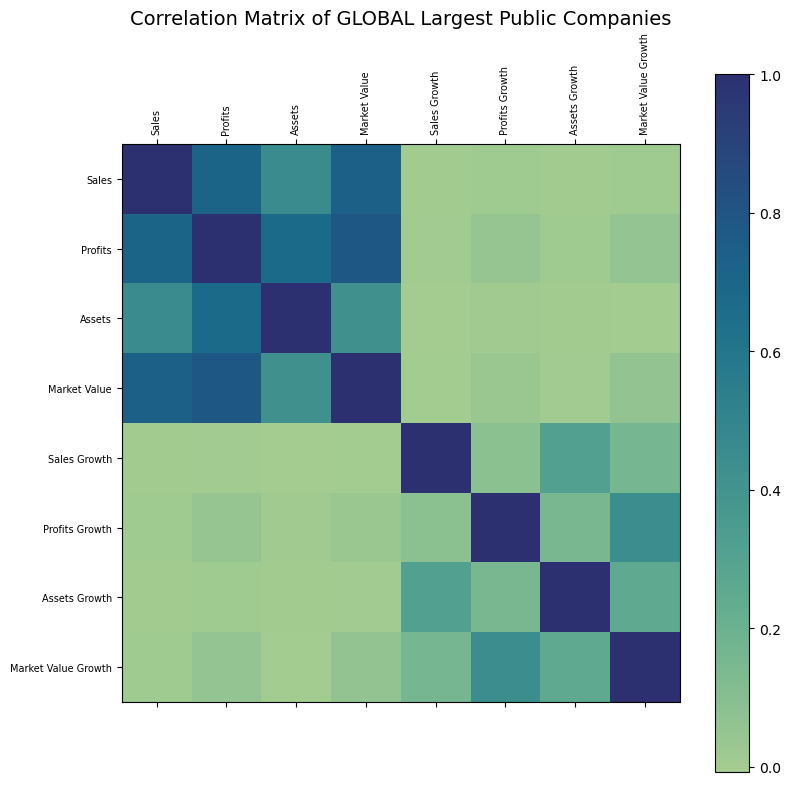

In [33]:
# GLOBAL
# Creating a Correlation Heatmap of the subset dataFrame
# Add labels, a legend, and change the size of the Heatmap

dfgwth_hm1 = plt.figure(figsize = (9, 9)) # figure size 
plt.matshow(dfgwth_hm.corr(), fignum = dfgwth_hm1.number, cmap = 'crest') # type of plot
plt.xticks(range(dfgwth_hm.shape[1]), dfgwth_hm.columns, fontsize = 7, rotation = 90) # x axis labels
plt.yticks(range(dfgwth_hm.shape[1]), dfgwth_hm.columns, fontsize = 7) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize = 10) # add font size
plt.title('Correlation Matrix of GLOBAL Largest Public Companies', fontsize = 14) # add title

Text(0.5, 1.0, 'Correlation Matrix of USA Largest Public Companies')

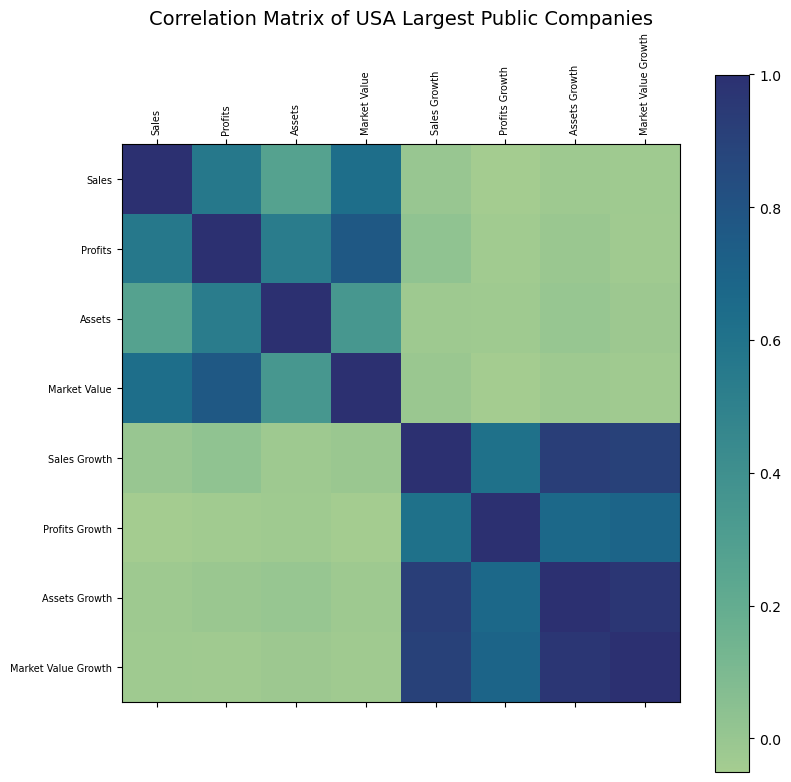

In [34]:
# USA Subset
# Creating a Correlation Heatmap of the subset dataFrame
# Add labels, a legend, and change the size of the Heatmap

usa_hm1 = plt.figure(figsize = (9, 9)) # figure size 
plt.matshow(usa_hm.corr(), fignum = usa_hm1.number, cmap = 'crest') # type of plot
plt.xticks(range(usa_hm.shape[1]), usa_hm.columns, fontsize = 7, rotation = 90) # x axis labels
plt.yticks(range(usa_hm.shape[1]), usa_hm.columns, fontsize = 7) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize = 10) # add font size
plt.title('Correlation Matrix of USA Largest Public Companies', fontsize = 14) # add title

Text(0.5, 1.0, 'Correlation Matrix of CHINA Largest Public Companies')

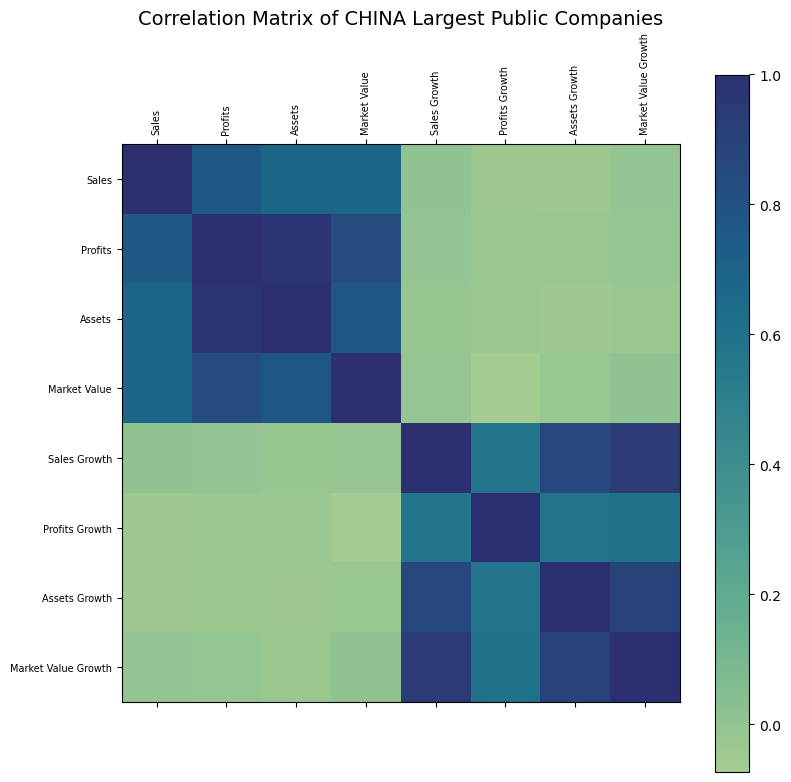

In [35]:
# CHINA Subset
# Creating a Correlation Heatmap of the subset dataFrame
# Add labels, a legend, and change the size of the Heatmap

chn_hm1 = plt.figure(figsize = (9, 9)) # figure size 
plt.matshow(chn_hm.corr(), fignum = chn_hm1.number, cmap = 'crest') # type of plot
plt.xticks(range(chn_hm.shape[1]), chn_hm.columns, fontsize = 7, rotation = 90) # x axis labels
plt.yticks(range(chn_hm.shape[1]), chn_hm.columns, fontsize = 7) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize = 10) # add font size
plt.title('Correlation Matrix of CHINA Largest Public Companies', fontsize = 14) # add title

Text(0.5, 1.0, 'Correlation Matrix of JAPAN Largest Public Companies')

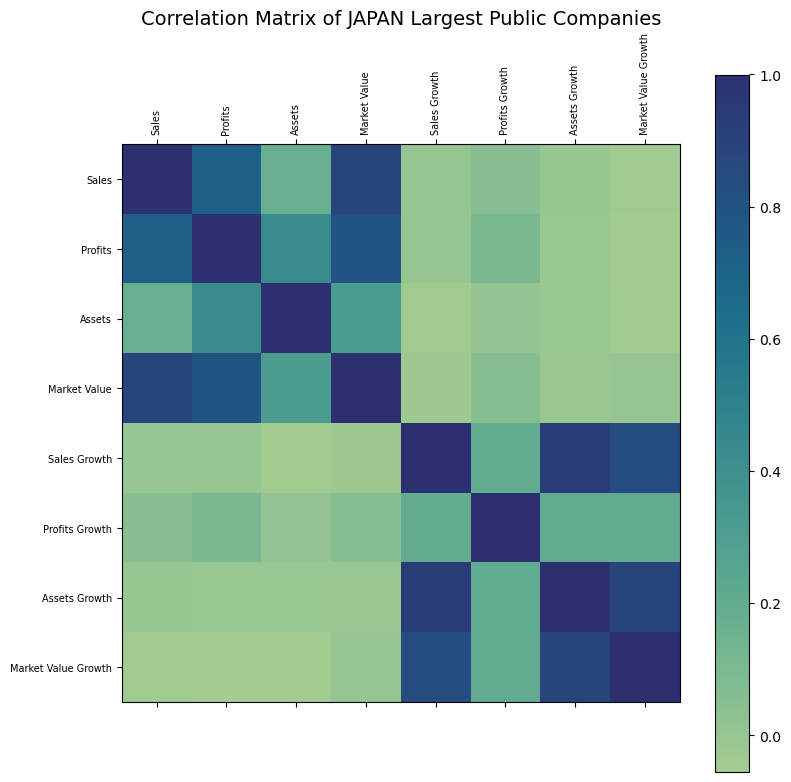

In [36]:
# JAPAN Subset
# Creating a Correlation Heatmap of the subset dataFrame
# Add labels, a legend, and change the size of the Heatmap

jpn_hm1 = plt.figure(figsize = (9, 9)) # figure size 
plt.matshow(jpn_hm.corr(), fignum = jpn_hm1.number, cmap = 'crest') # type of plot
plt.xticks(range(jpn_hm.shape[1]), jpn_hm.columns, fontsize = 7, rotation = 90) # x axis labels
plt.yticks(range(jpn_hm.shape[1]), jpn_hm.columns, fontsize = 7) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize = 10) # add font size
plt.title('Correlation Matrix of JAPAN Largest Public Companies', fontsize = 14) # add title

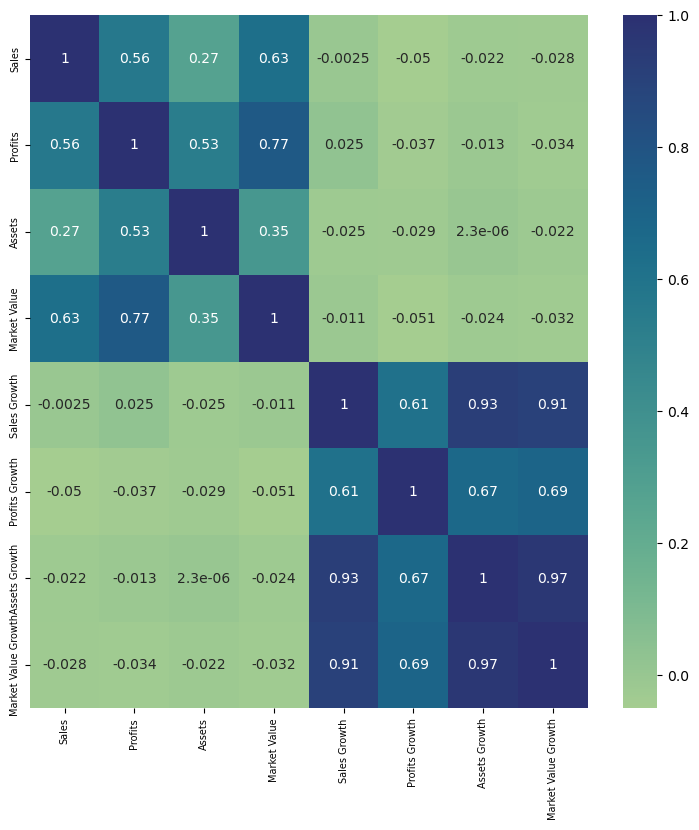

In [37]:
# GLOBAL
# Create a subplot with matplotlib

dfgwth_hm1,ax = plt.subplots(figsize = (9,9))
plt.xticks(range(dfgwth_hm.shape[1]), dfgwth_hm.columns, fontsize = 7, rotation = 90) # x axis labels
plt.yticks(range(dfgwth_hm.shape[1]), dfgwth_hm.columns, fontsize = 7) # y axis labels

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix 
glbl_hm2 = sns.heatmap(usa_hm.corr(), cmap = 'crest', annot = True, ax = ax)

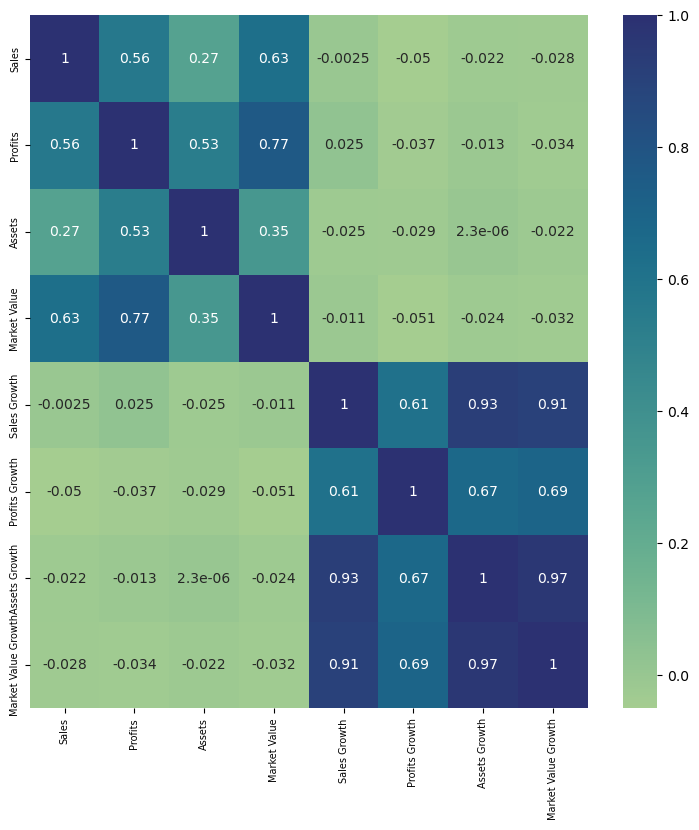

In [38]:
# USA Subset
# Create a subplot with matplotlib

usa_hm1,ax = plt.subplots(figsize = (9,9))
plt.xticks(range(usa_hm.shape[1]), usa_hm.columns, fontsize = 7, rotation = 90) # x axis labels
plt.yticks(range(usa_hm.shape[1]), usa_hm.columns, fontsize = 7) # y axis labels

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix 
usa_hm2 = sns.heatmap(usa_hm.corr(), cmap = 'crest', annot = True, ax = ax)

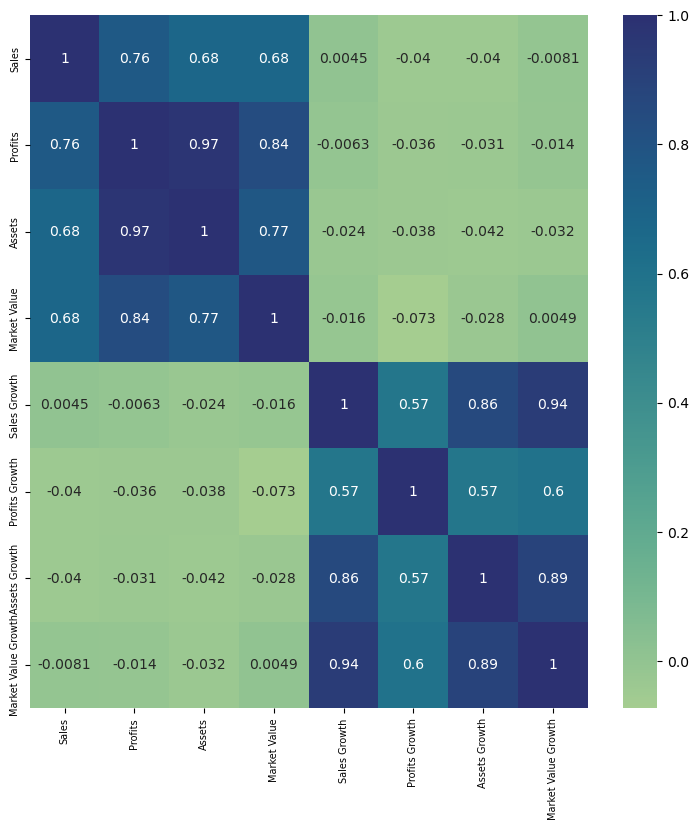

In [39]:
# CHINA Subset
# Create a subplot with matplotlib

chn_hm1,ax = plt.subplots(figsize = (9,9))
plt.xticks(range(chn_hm.shape[1]), chn_hm.columns, fontsize = 7, rotation = 90) # x axis labels
plt.yticks(range(chn_hm.shape[1]), chn_hm.columns, fontsize = 7) # y axis labels

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix 
chn_hm2 = sns.heatmap(chn_hm.corr(), cmap = 'crest', annot = True, ax = ax)

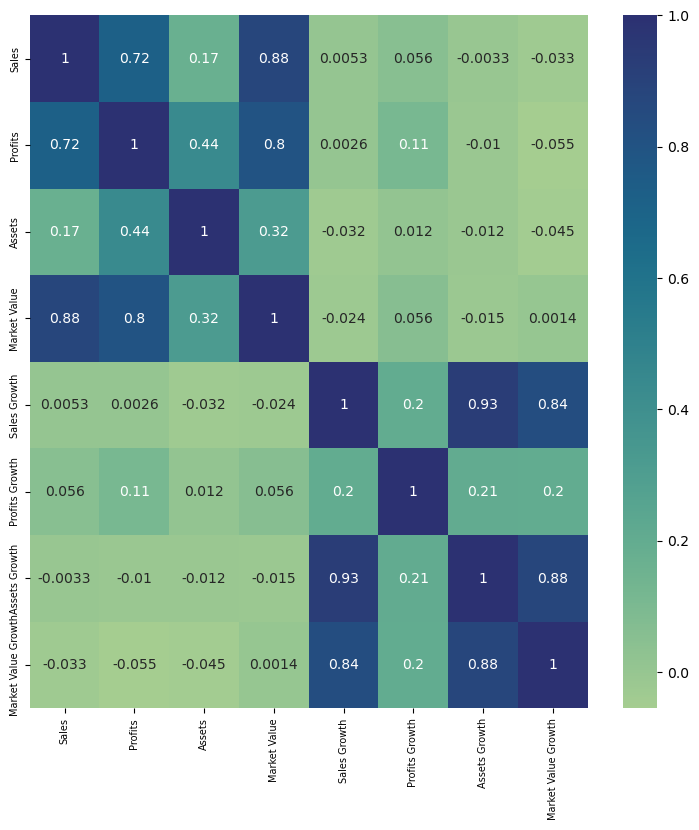

In [40]:
# JAPAN Subset
# Create a subplot with matplotlib

jpn_hm1,ax = plt.subplots(figsize = (9,9))
plt.xticks(range(jpn_hm.shape[1]), jpn_hm.columns, fontsize = 7, rotation = 90) # x axis labels
plt.yticks(range(jpn_hm.shape[1]), jpn_hm.columns, fontsize = 7) # y axis labels

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix 
jpn_hm2 = sns.heatmap(jpn_hm.corr(), cmap = 'crest', annot = True, ax = ax)

**COEFFICIENT SCALE:**

        0    : No relationship
    0.1 - 0.3: Weak relationship
    0.3 - 0.5: Moderate relationship
    0.5 - 1.0: Strong relationship
******

**OBSERVATION:** The heatmap displays unique coefficients in different settings; however, it is evident that there are strong positive correlations between all four metrics. This indicates that performance growth demonstrates a high degree of association with all variables, with the `exception` of Japan's Profits, which displays a very weak relationship.

_This opens up a whole new set of questions, such as:_

- What is the industry-type density for these regions? 
    - How are they contributing to the countries growth? 
    - Are there any notable differences year-to-year?
- Are the differences between industries/companies' trends before and during the pandemic unique or the same?
    - Which companies/industries excel the most? The least?
- What other influential factors drive these correlations?

### b) Scatterplots

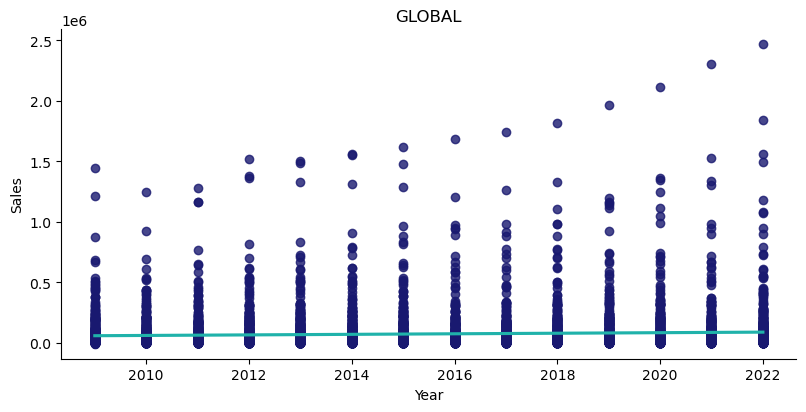

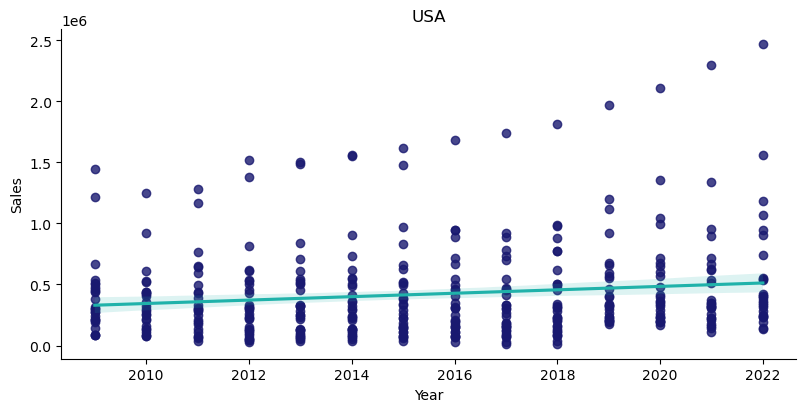

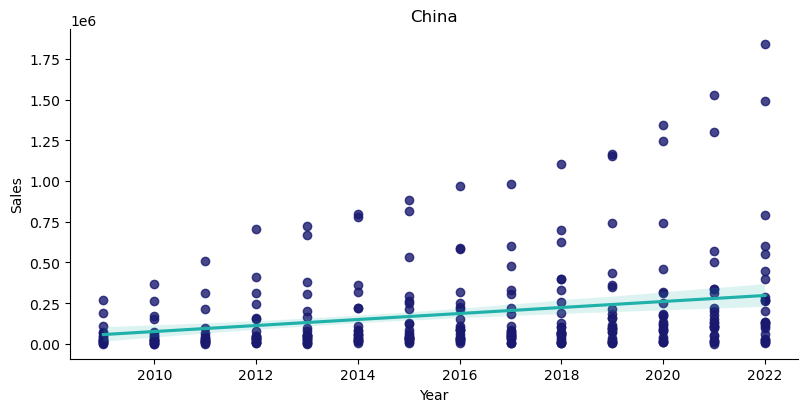

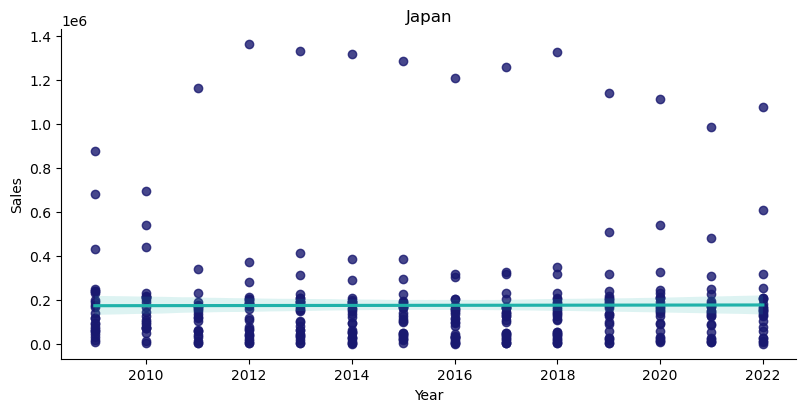

In [41]:
# Create a Scatterplot in seaborn for the "Sales" with "Profit" for all subsets

glbl_sp = sns.lmplot(y = 'Sales', x = 'Year', data = dfgwth, scatter_kws = {'color': 'midnightblue'}, line_kws = {'color': 'lightseagreen'}, height = 5, aspect = 2)
glbl_sp.fig.set_size_inches(8,4)
glbl_sp.set(title='GLOBAL')

usa_sp = sns.lmplot(y = 'Sales', x = 'Year', data = usa, scatter_kws = {'color': 'midnightblue'}, line_kws = {'color': 'lightseagreen'}, height = 5, aspect = 2)
usa_sp.fig.set_size_inches(8,4)
usa_sp.set(title='USA')

chn_sp = sns.lmplot(y = 'Sales',  x= 'Year', data = chn, scatter_kws = {'color': 'midnightblue'}, line_kws = {'color': 'lightseagreen'}, height = 5, aspect = 2)
chn_sp.fig.set_size_inches(8,4)
chn_sp.set(title='China')

jpn_sp = sns.lmplot(y = 'Sales', x = 'Year', data = jpn, scatter_kws = {'color': 'midnightblue'}, line_kws = {'color': 'lightseagreen'}, height = 5, aspect = 2)
jpn_sp.fig.set_size_inches(8,4)
jpn_sp.set(title='Japan')

# Show the plots
plt.show()

**OBSERVATION:** It is not surprising to see, in assessing the year-to-year absolute sales, that the USA and China follow the global upward trend, given that these two countries have the highest counts of top performers. However, Japan's fluctuating developments are unexpected. The sales appear to climb in 2017 but drop again in 2021. Conversely, all scatterplots appear to show the presence of some outliers in the data points.

### c) Pair Plots

In [42]:
# Using variables for the pair plot

glblpp = dfgwth[['Year', 'Sales', 'Profits', 'Assets', 'Market Value', 'Sales Growth', 'Profits Growth', 'Assets Growth', 'Market Value Growth']]
usapp = usa[['Year', 'Sales', 'Profits', 'Assets', 'Market Value', 'Sales Growth', 'Profits Growth', 'Assets Growth', 'Market Value Growth']]
chnpp = chn[['Year', 'Sales', 'Profits', 'Assets', 'Market Value', 'Sales Growth', 'Profits Growth', 'Assets Growth', 'Market Value Growth']]
jpnpp = jpn[['Year', 'Sales', 'Profits', 'Assets', 'Market Value', 'Sales Growth', 'Profits Growth', 'Assets Growth', 'Market Value Growth']]

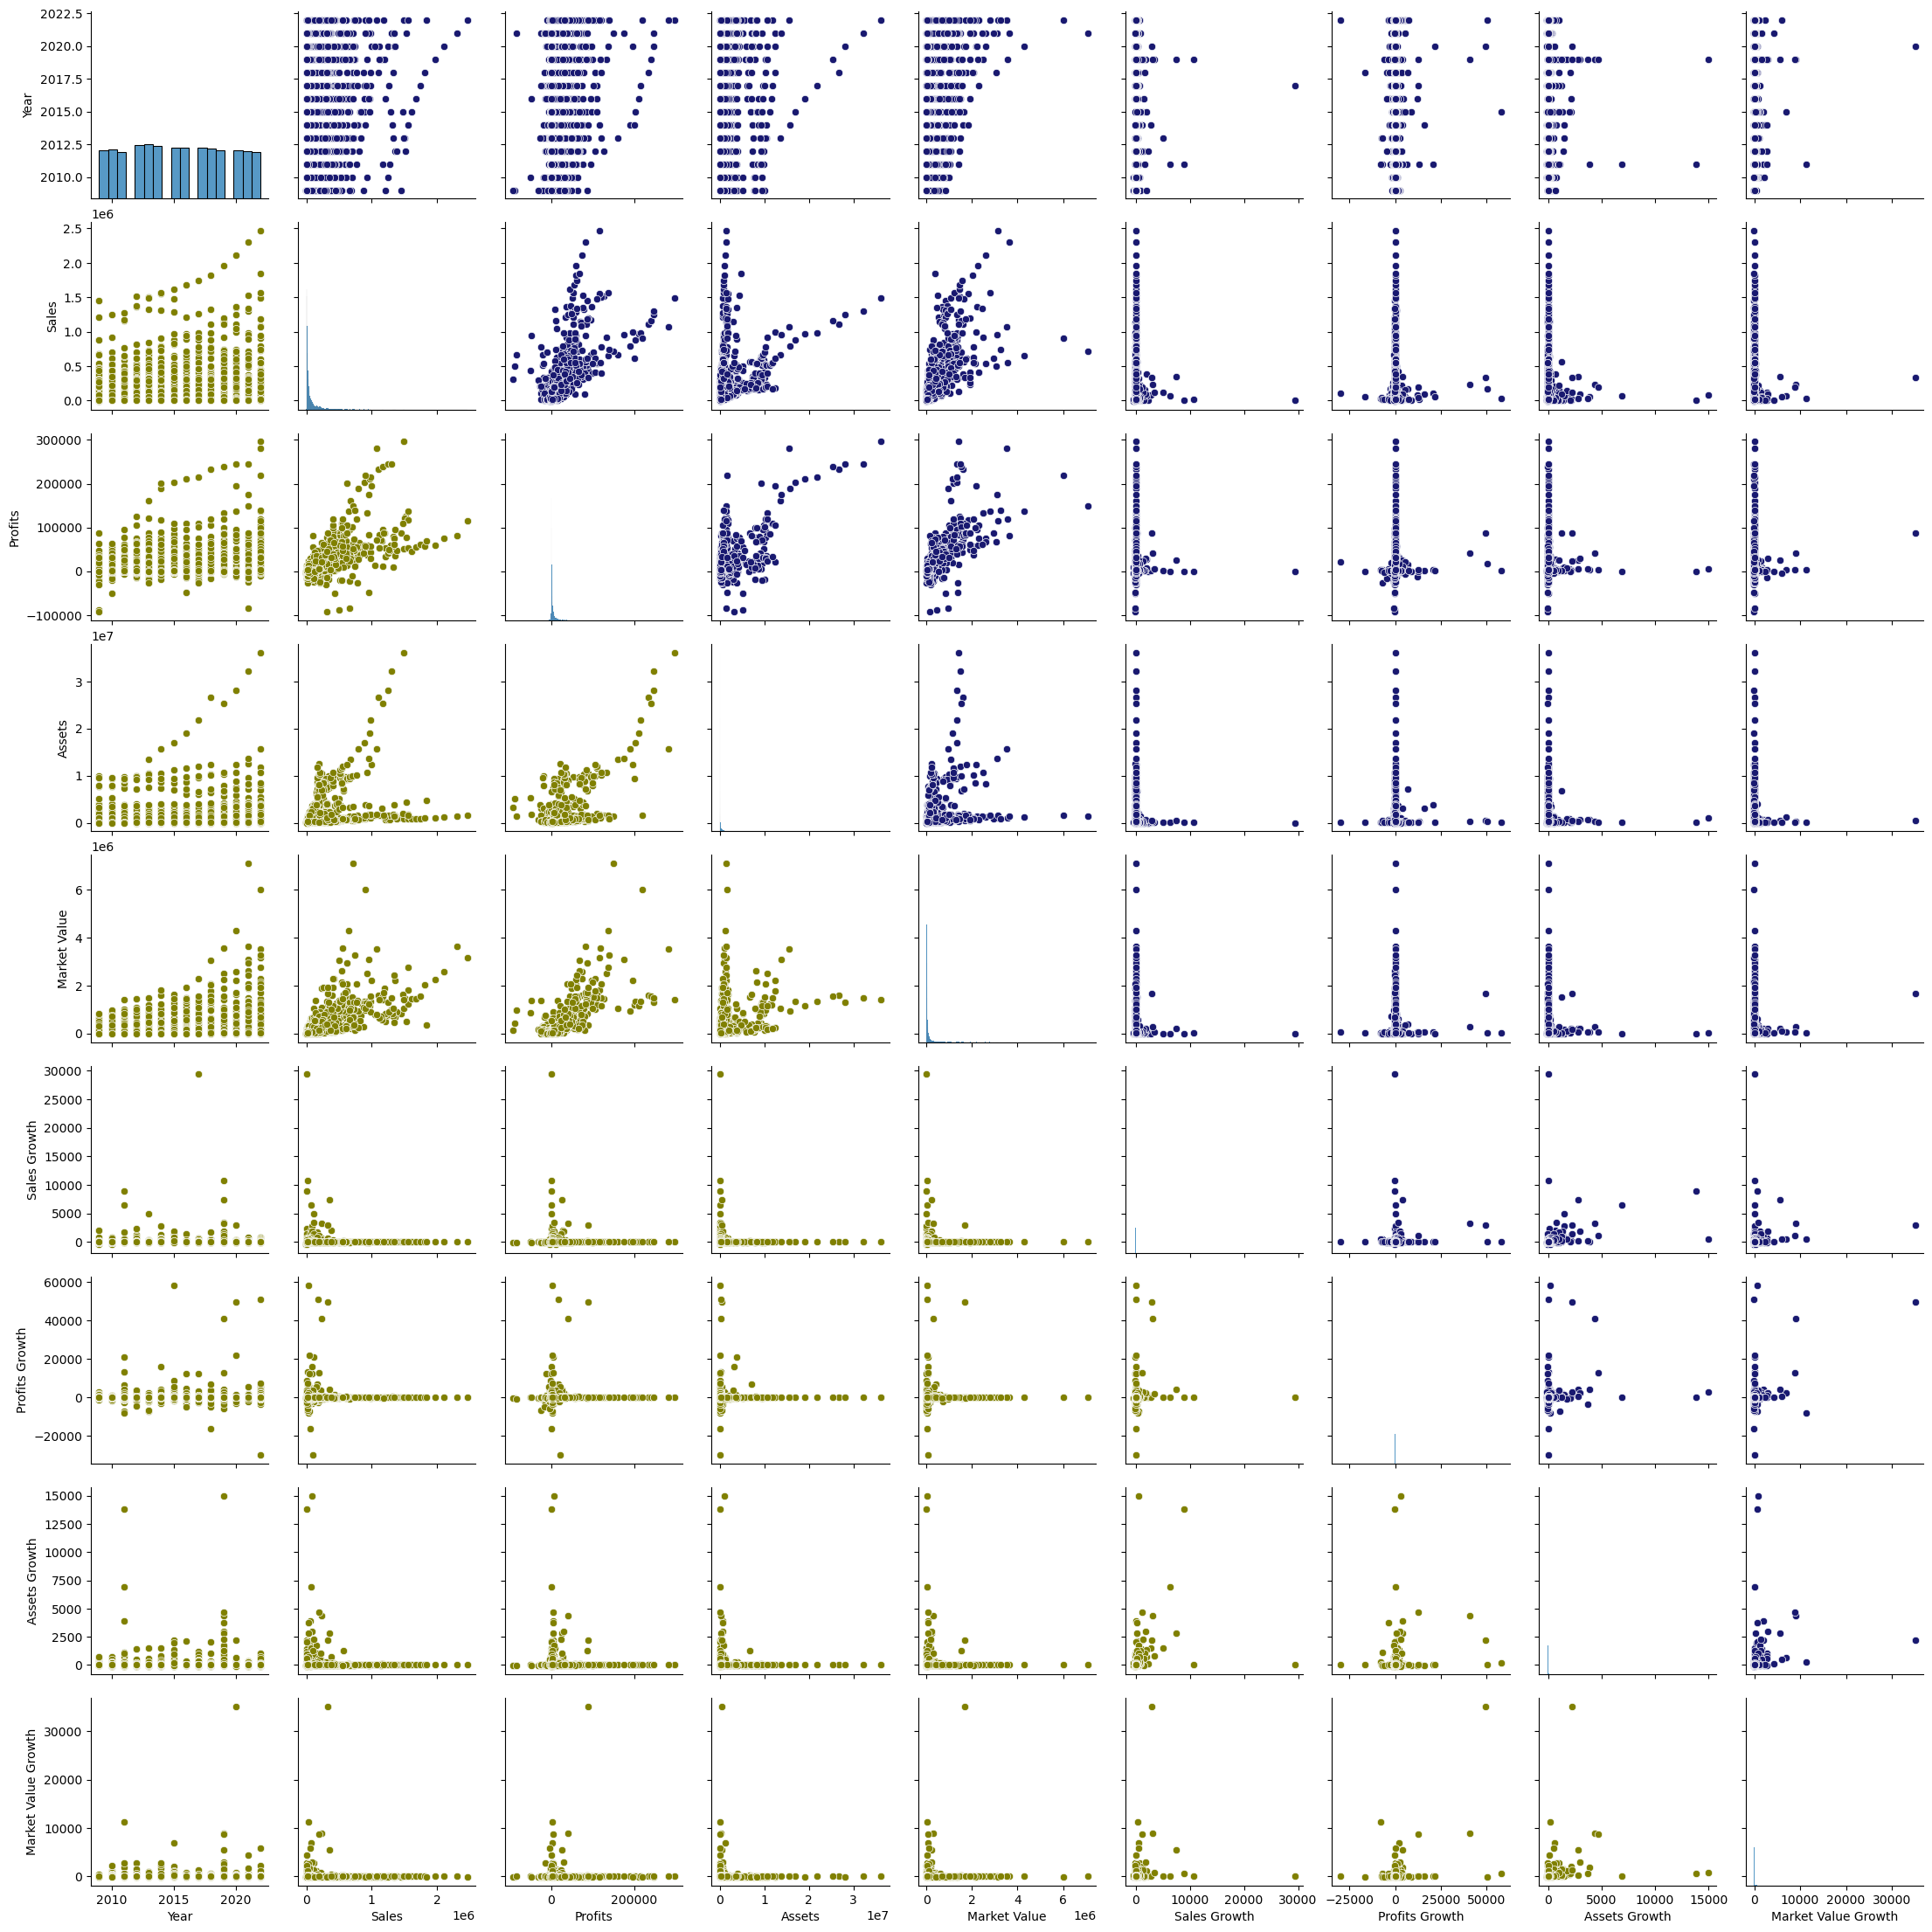

In [43]:
# GLOBAL
# Create a first Pair Plots

glbl_pp = sns.pairplot(glblpp)
glbl_pp.map_upper(sns.scatterplot, color = 'midnightblue')
glbl_pp.map_lower(sns.scatterplot, color = 'olive')

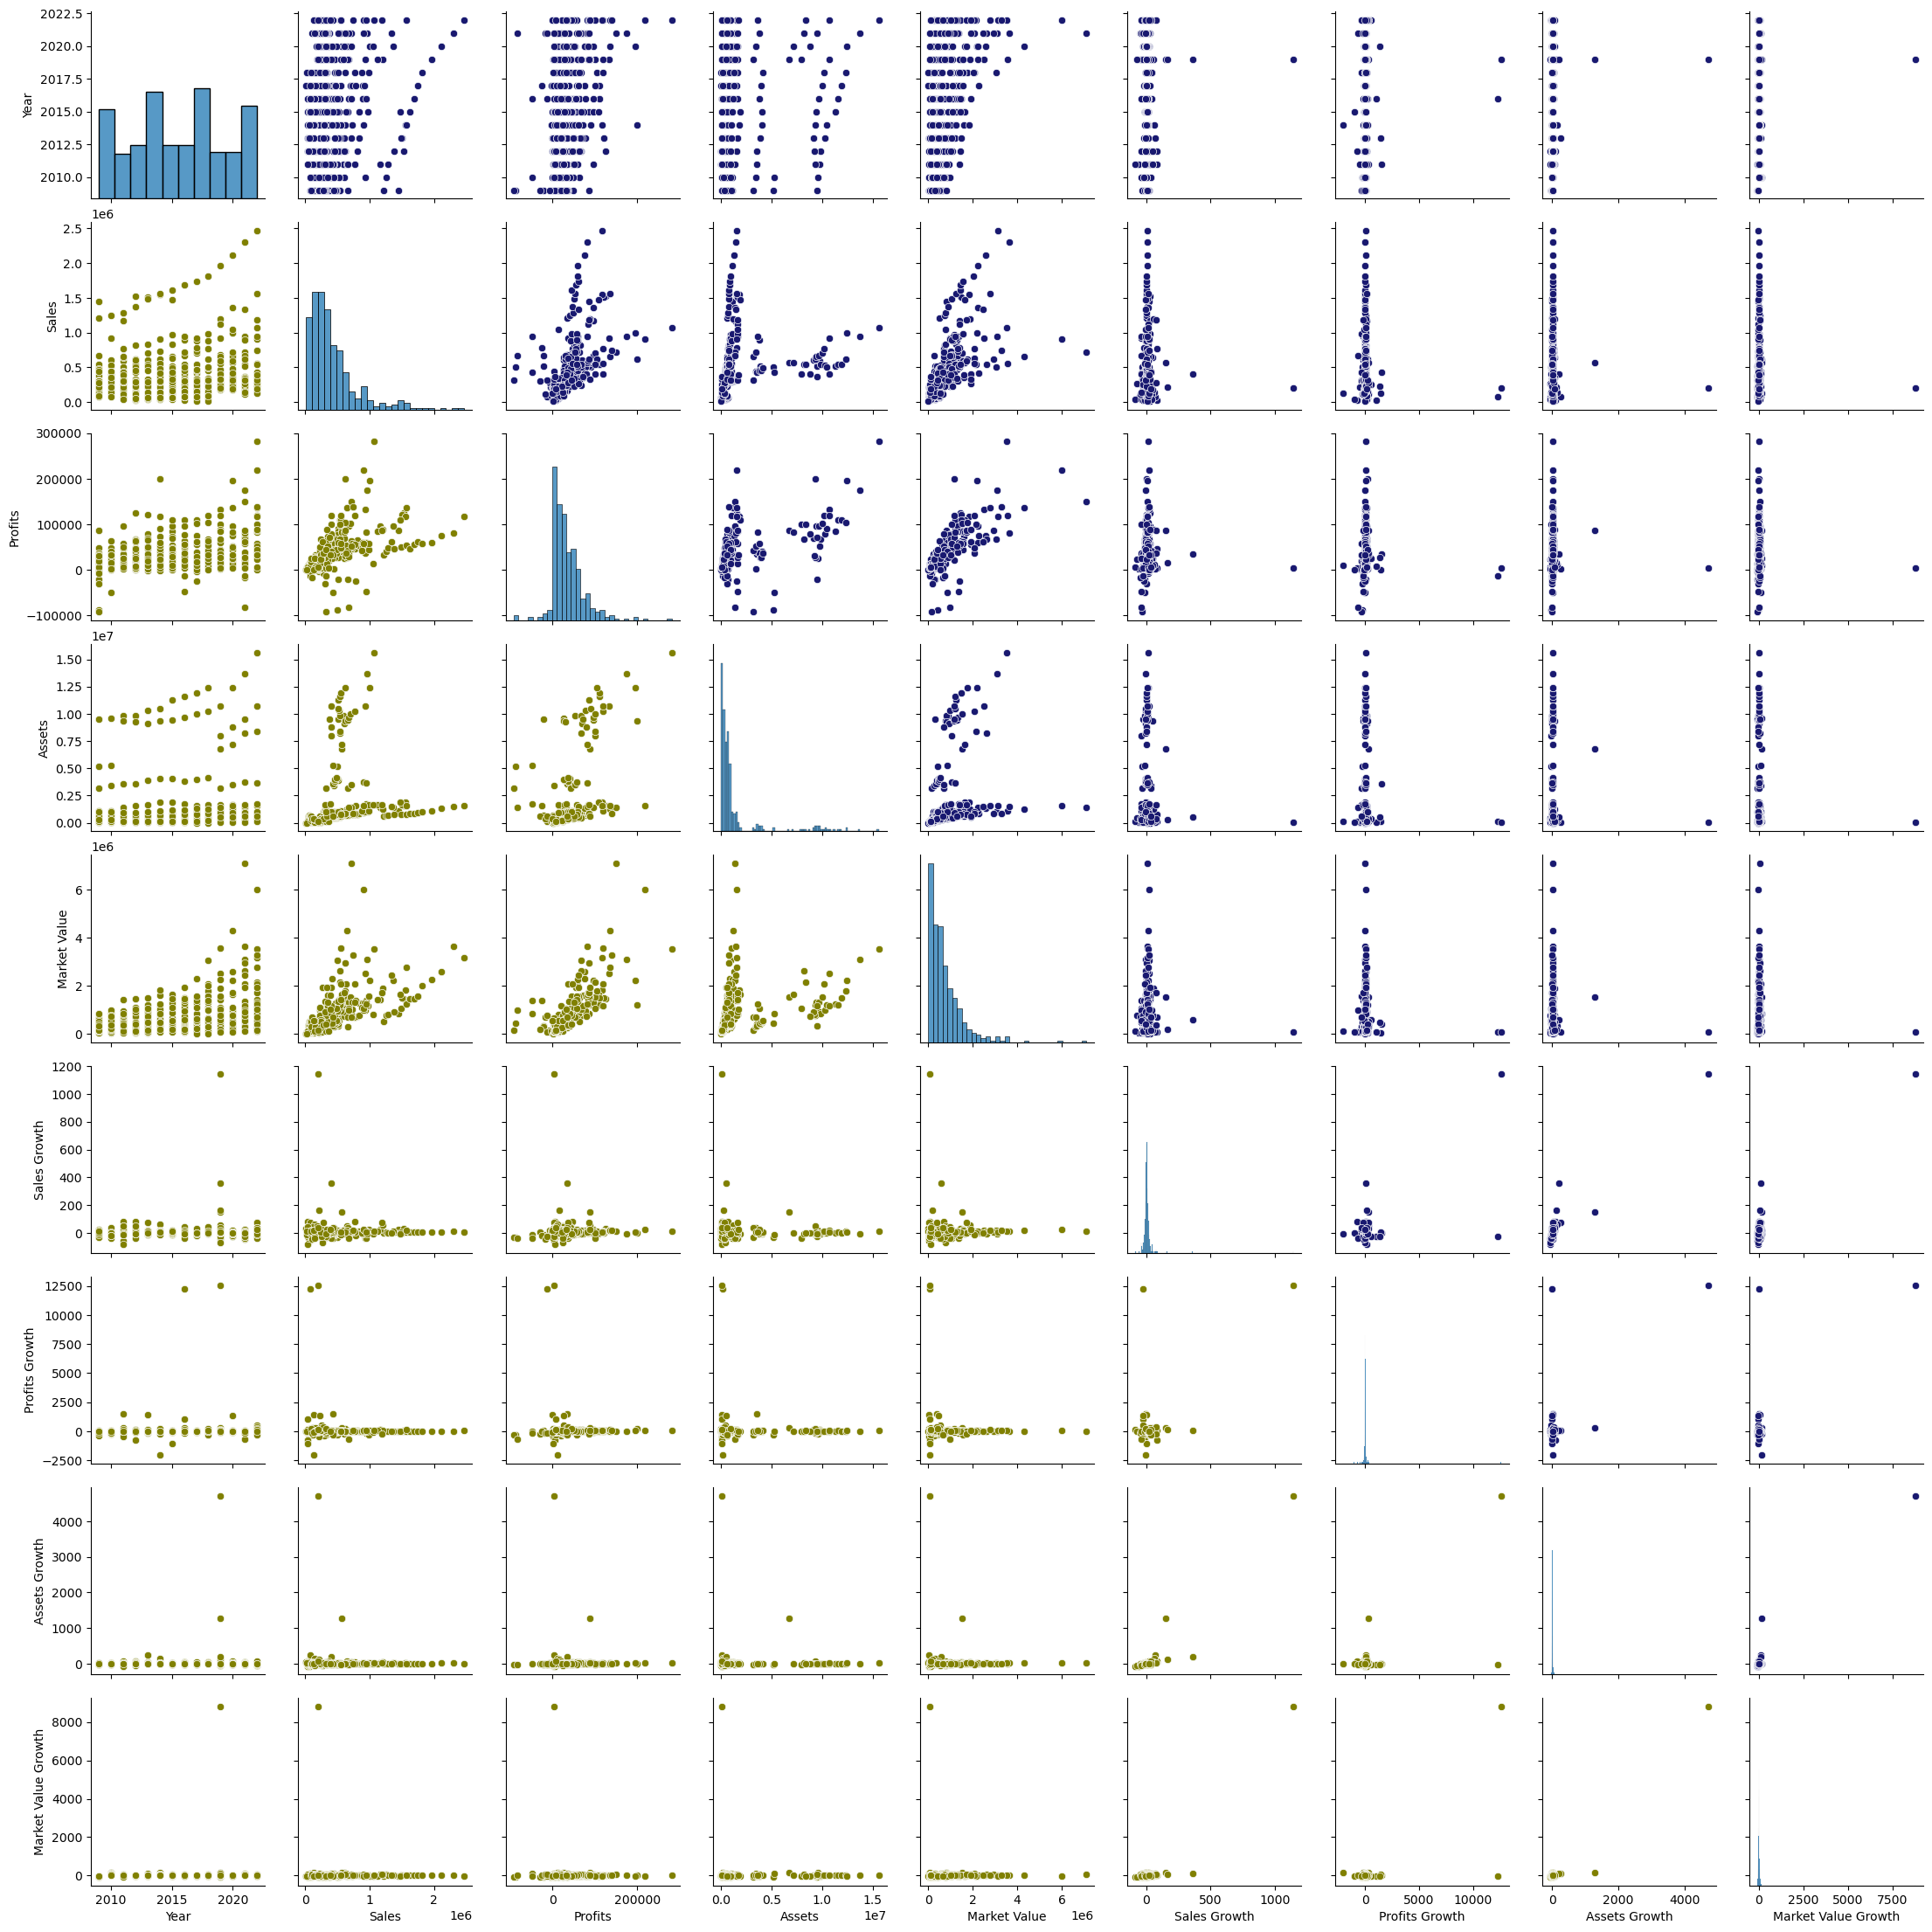

In [44]:
# USA Subset
# Create a first Pair Plots

usa_pp = sns.pairplot(usapp)
usa_pp.map_upper(sns.scatterplot, color = 'midnightblue')
usa_pp.map_lower(sns.scatterplot, color = 'olive')

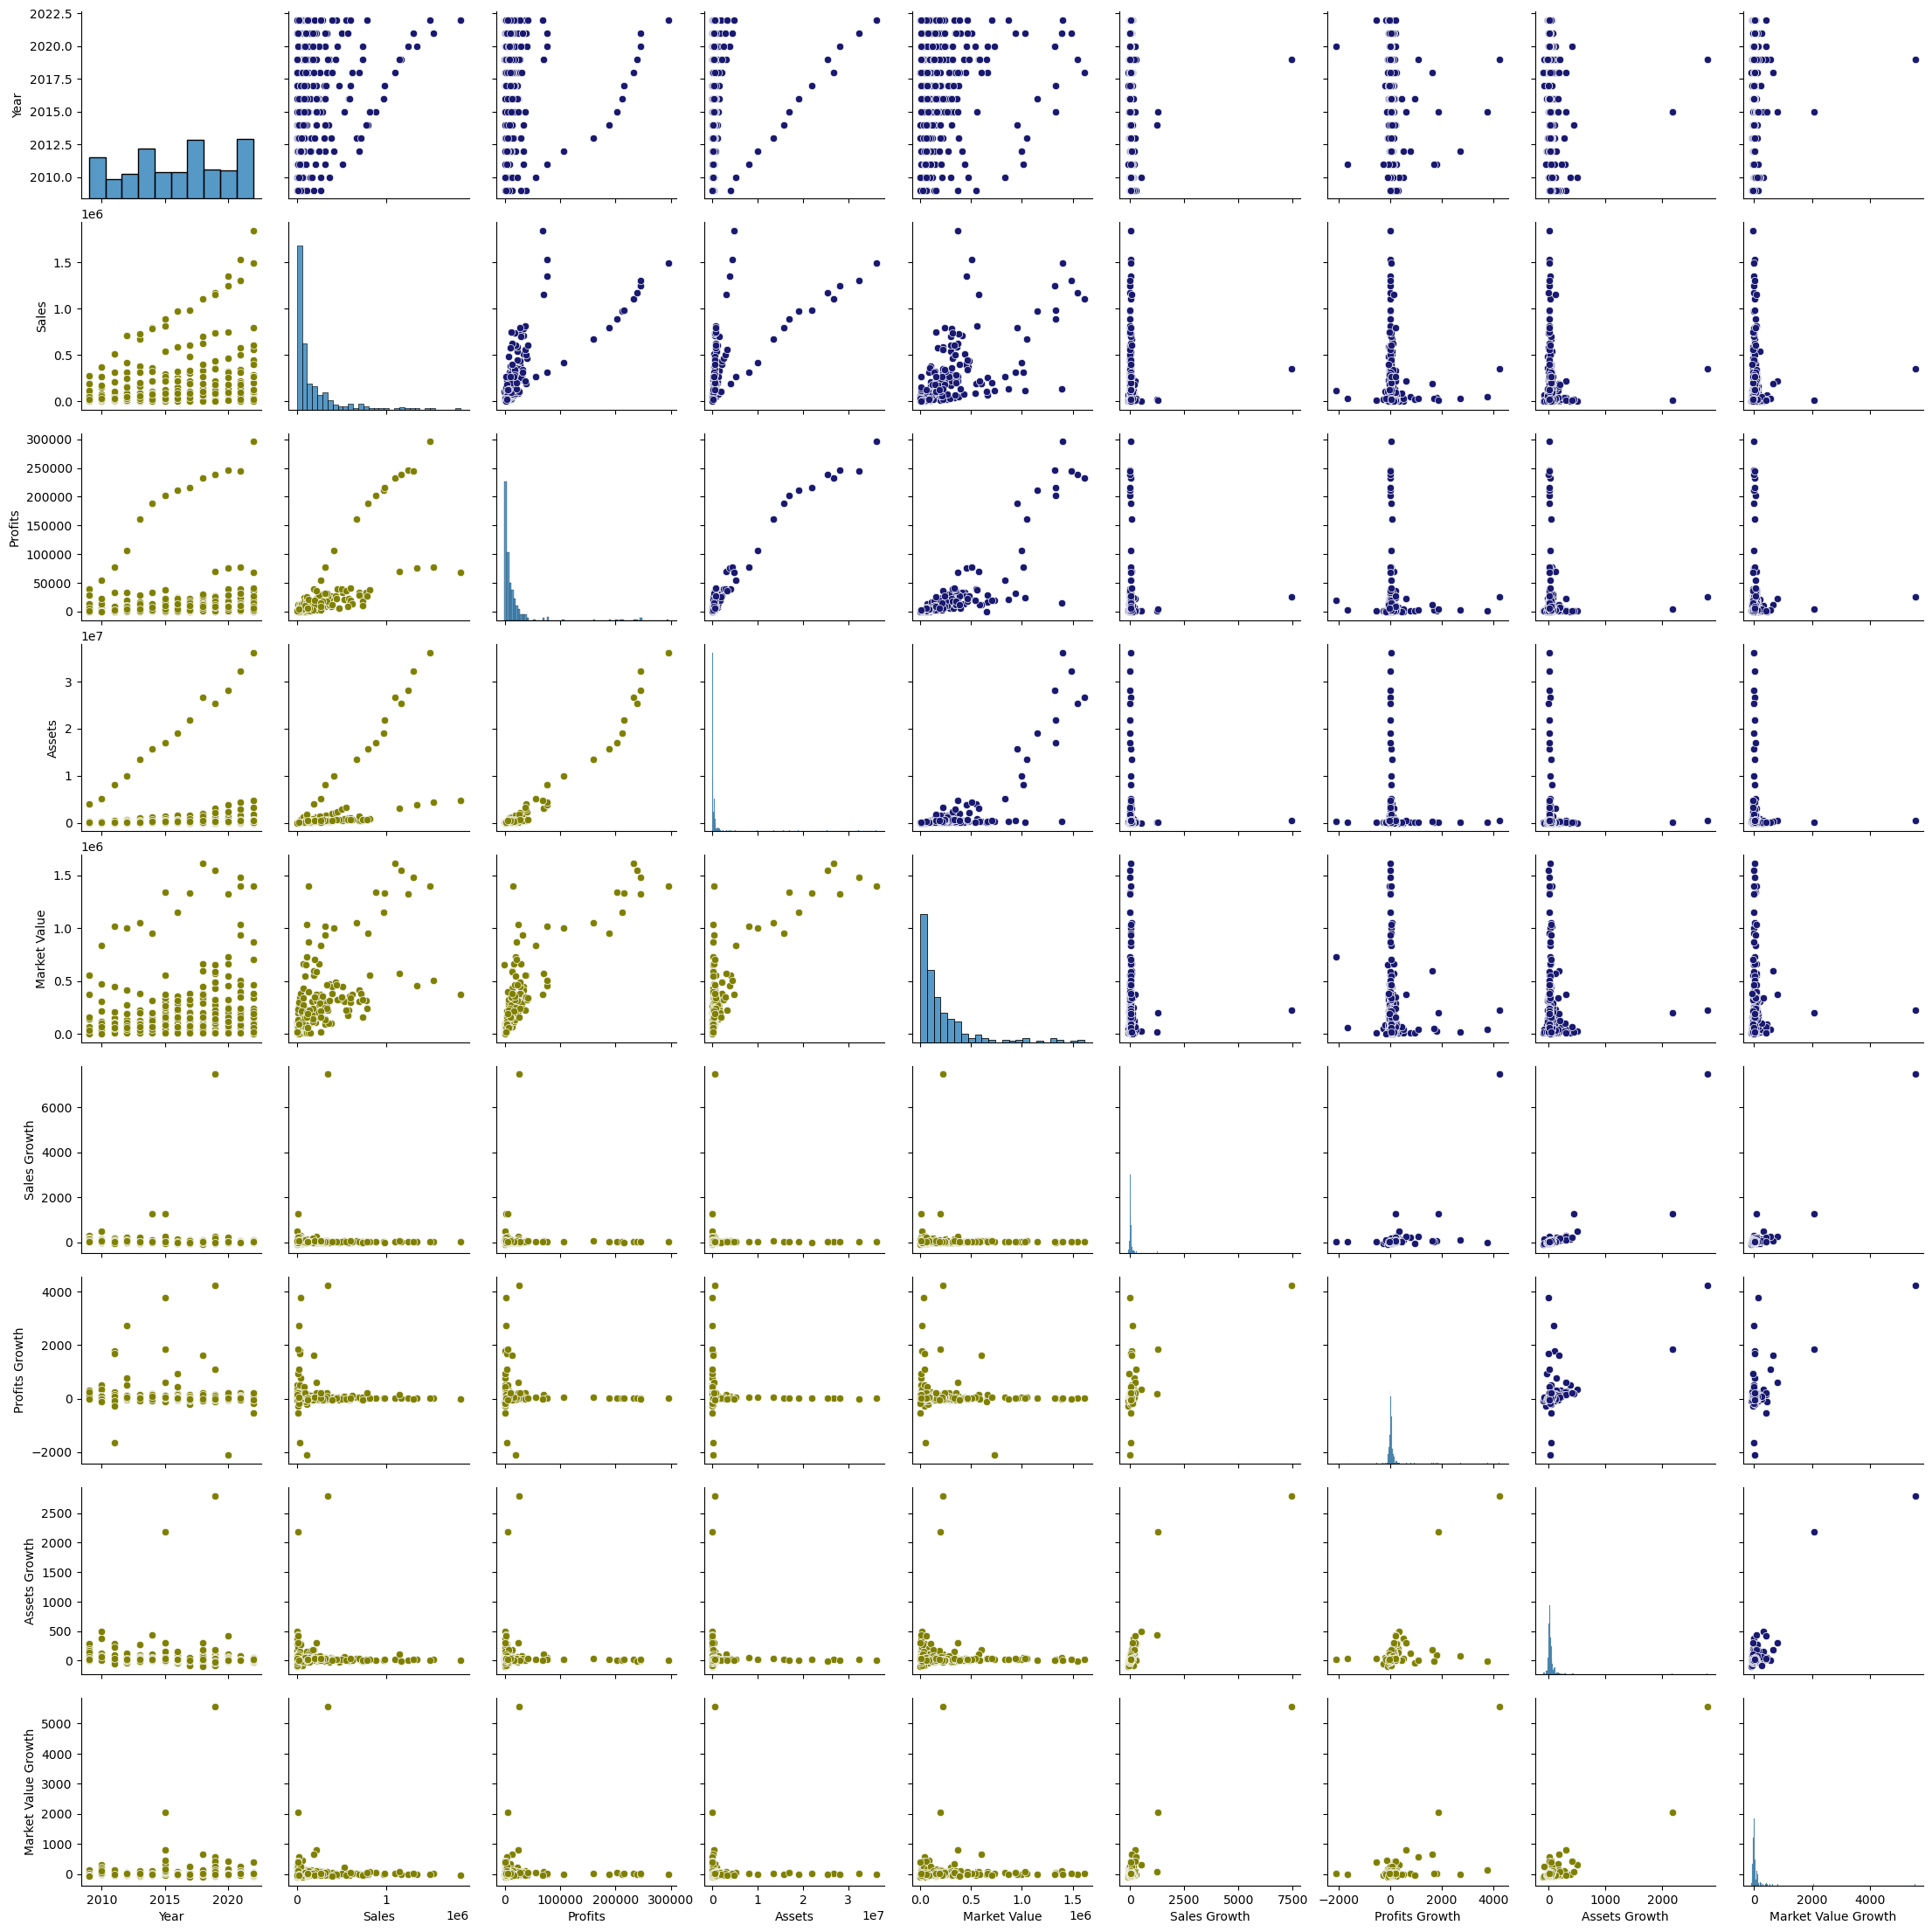

In [45]:
# CHINA Subset
# Create a first Pair Plots

chn_pp = sns.pairplot(chnpp)
chn_pp.map_upper(sns.scatterplot, color = 'midnightblue')
chn_pp.map_lower(sns.scatterplot, color = 'olive')

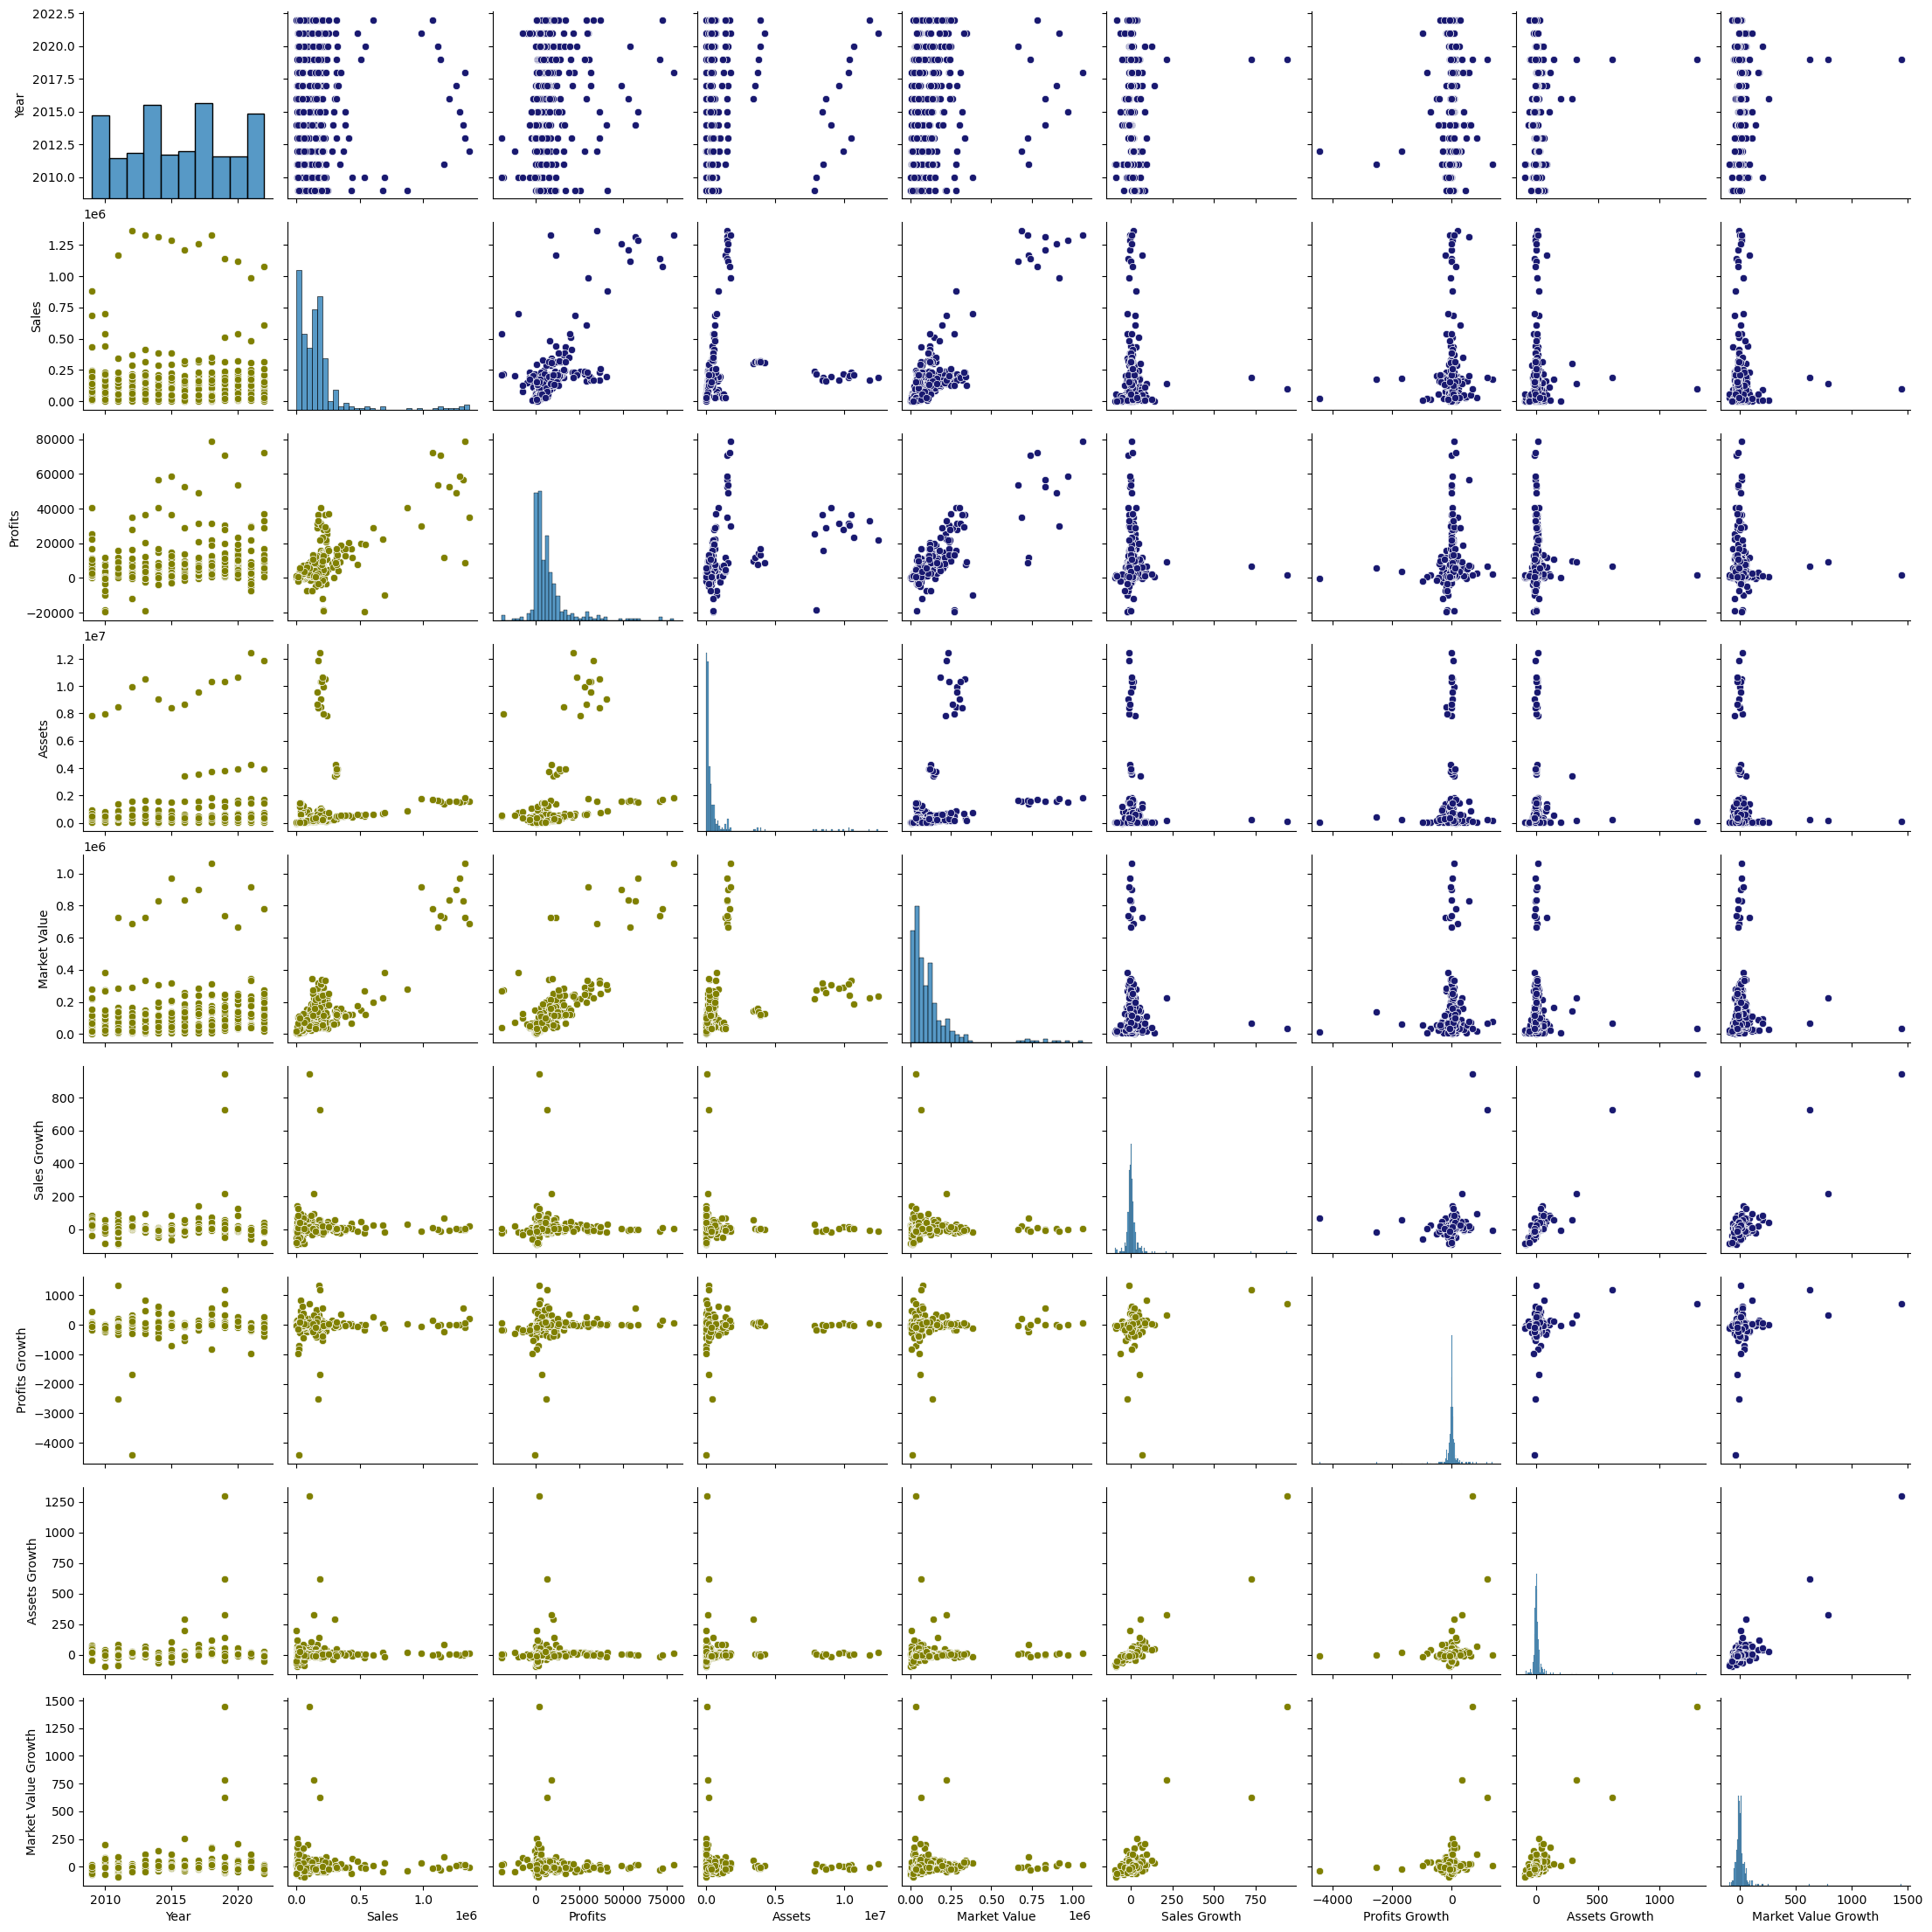

In [46]:
# JAPAN Subset
# Create a first Pair Plots

jpn_pp = sns.pairplot(jpnpp)
jpn_pp.map_upper(sns.scatterplot, color = 'midnightblue')
jpn_pp.map_lower(sns.scatterplot, color = 'olive')

**OBSERVATION:** Evaluating the pairplots, observes some unusual data points in both the bar and scatterplots. While both appears to show some important trends, it is important to note that distribution of the growth rate in this visualization may be detecting some outliers in the datasets. 

**ADDITIONAL NOTES:**

- `Sales:` 2019 displays an interesting inclination in the year-to-year trends. There is a notable increase in sales, but it drops in 2020 for all regions. This development may prove the effects on businesses reacting to the COVID-19 outbreak (social distancing, consumsers' unusual buying behaviors, etc.) while the decline in 2020 may have slowed down sales due to a shortage of resources to meet public demands.

- `Profits:` Without a doubt, the patterns in earnings closely align with the year-to-year increase of revenue from 2019 to the current period, indicating a robust positive correlation.

- `Assets:` Industries show the same trending effects as sales but gradually declined from 2020 to 2021. This period coincided with the strict implementation of complete social distancing and face mask requirements by local governments. In this case, it is possible that the productivity rate (e.g., shutdowns, etc.) may have slowed down as companies complied with pandemic prevention measures to mitigate the spread of COVID-19.

- `Market Value:` Similarly, the observed patterns in the later years demonstrate similar effects to the first three metrics 

### d) Categorical Plots

Text(0.5, 1.0, 'CATERGORICAL PLOT OF TOTAL INDUSTRY GLOBALLY')

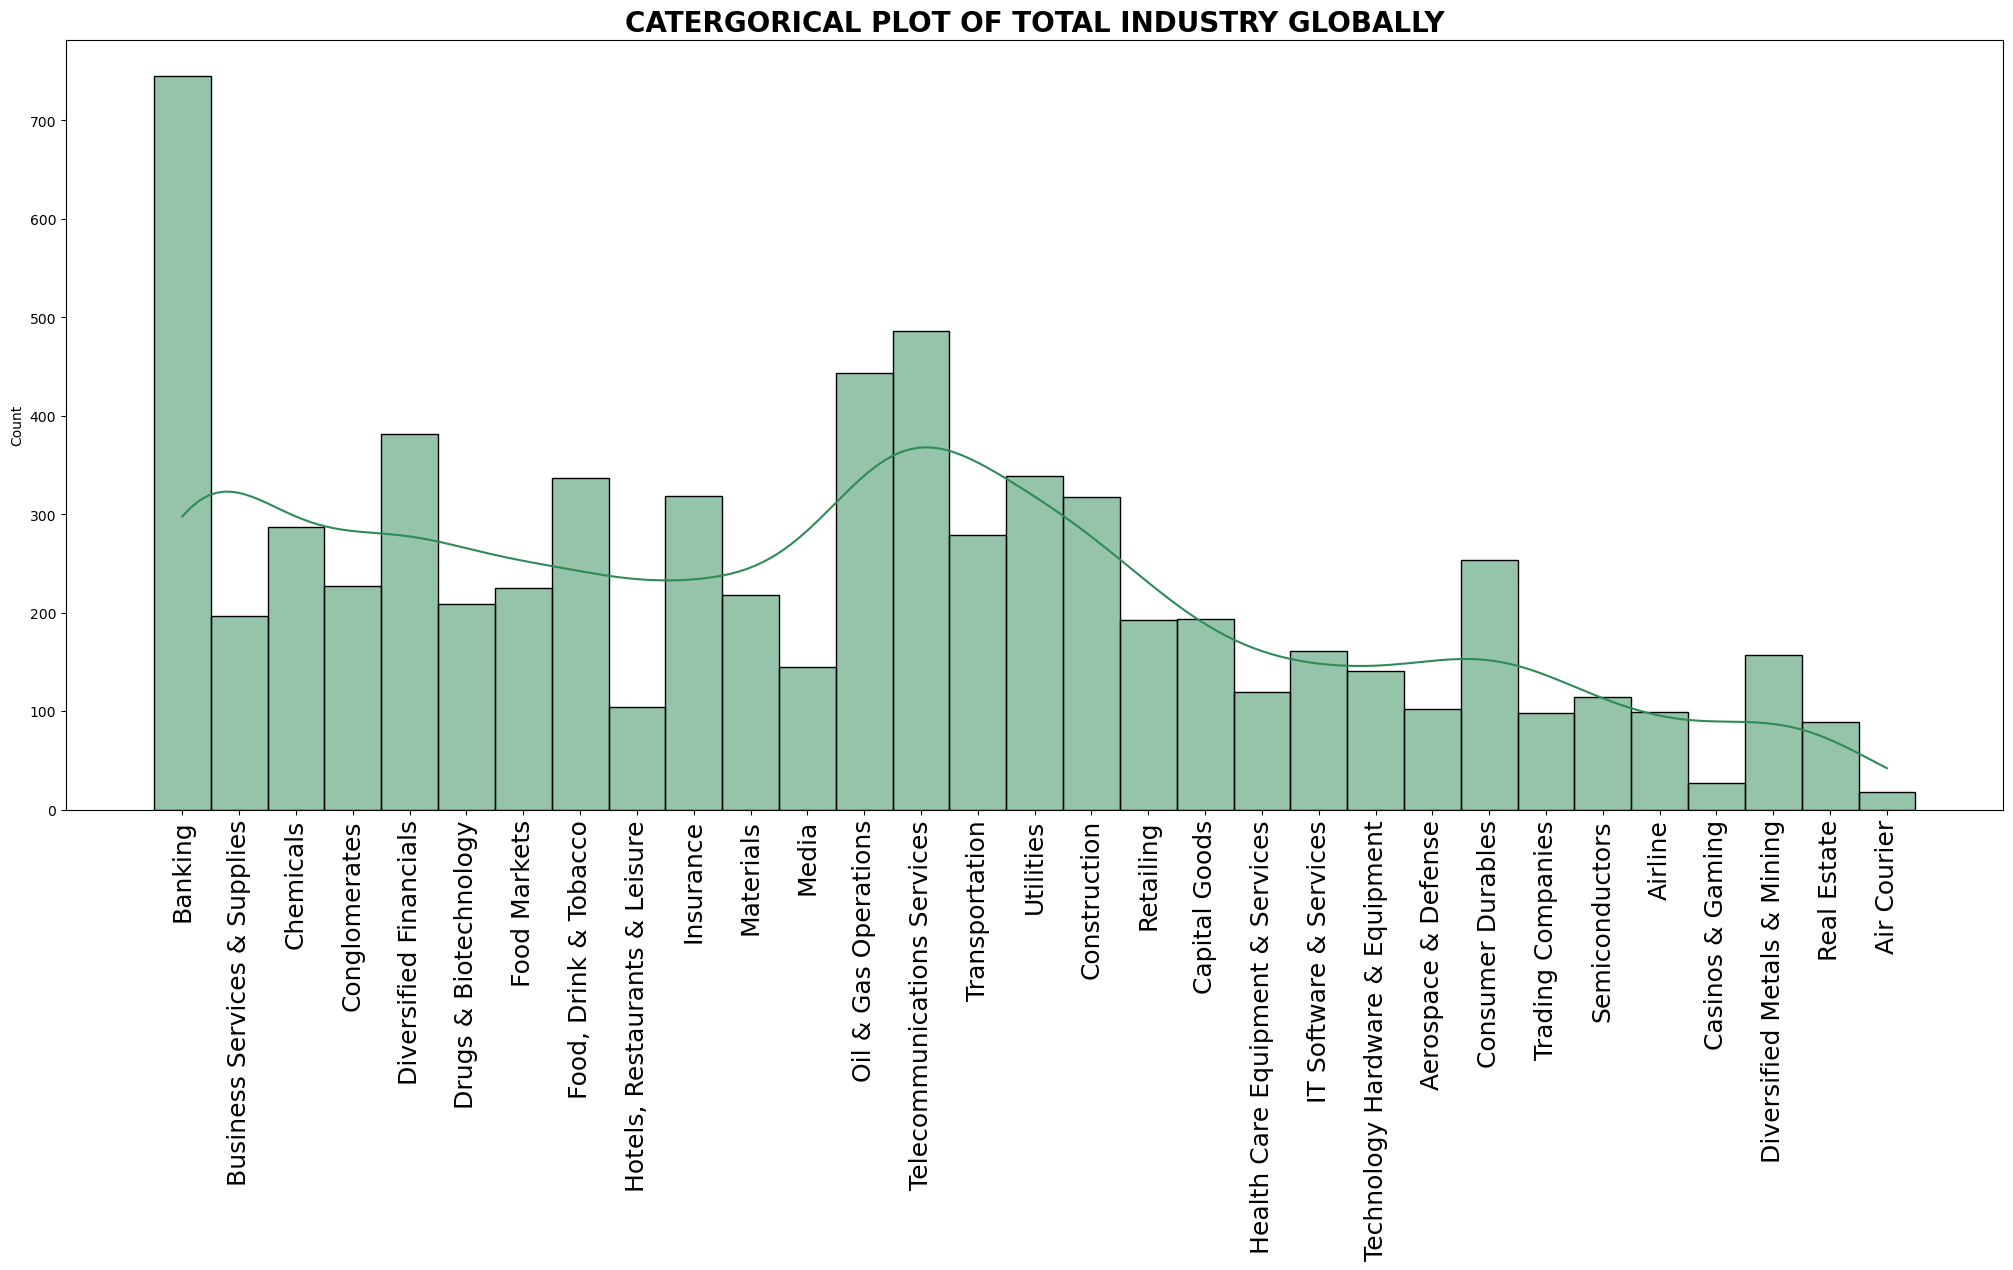

In [47]:
# GLOBAL
# Set the figure size
plt.figure(figsize = (25,10))

# Use a histogram to visualize the distribution of the variables. 
hist_glbl = sns.histplot(dfgwth['Industry'], bins = 10, color = 'seagreen', kde = True)

# Adding annotations to the graph 
plt.xlabel('')
plt.xticks(fontsize = 18, rotation = 90)

# Set the figure size
plt.title('CATERGORICAL PLOT OF TOTAL INDUSTRY GLOBALLY', fontsize = 20, fontweight = 'bold')

Text(0.5, 1.0, 'CATERGORICAL PLOT OF TOTAL USA INDUSTRY')

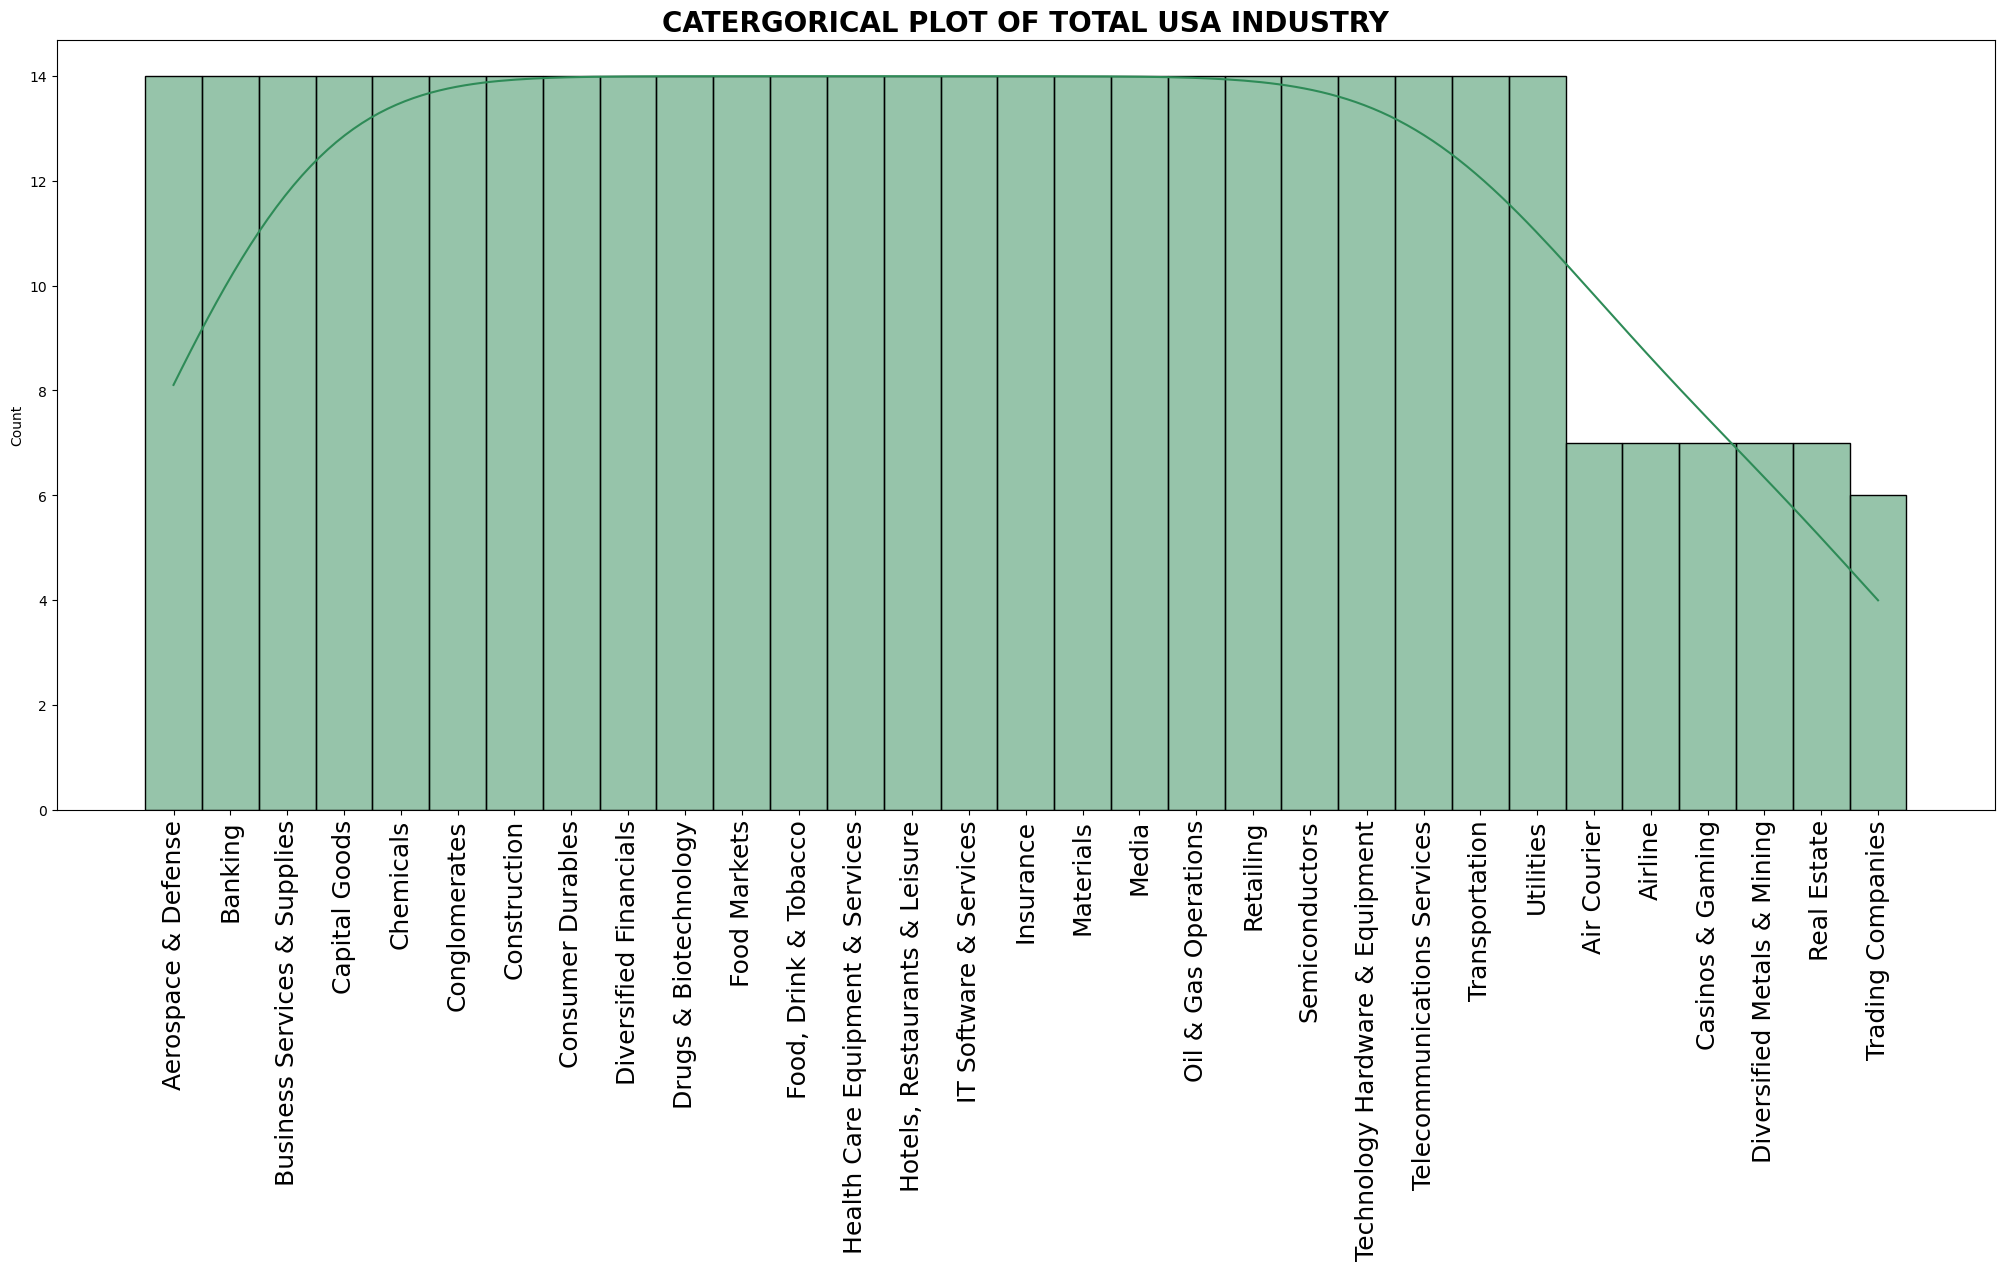

In [48]:
# USA Subset
# Set the figure size
plt.figure(figsize = (25,10))

# Use a histogram to visualize the distribution of the variables. 
hist_usa = sns.histplot(usa['Industry'], bins = 10, color = 'seagreen', kde = True)

# Adding annotations to the graph 
plt.xlabel('')
plt.xticks(fontsize = 18, rotation = 90)

# Set the figure size
plt.title('CATERGORICAL PLOT OF TOTAL USA INDUSTRY', fontsize = 20, fontweight = 'bold')

Text(0.5, 1.0, 'CATERGORICAL PLOT OF TOTAL CHINA INDUSTRY')

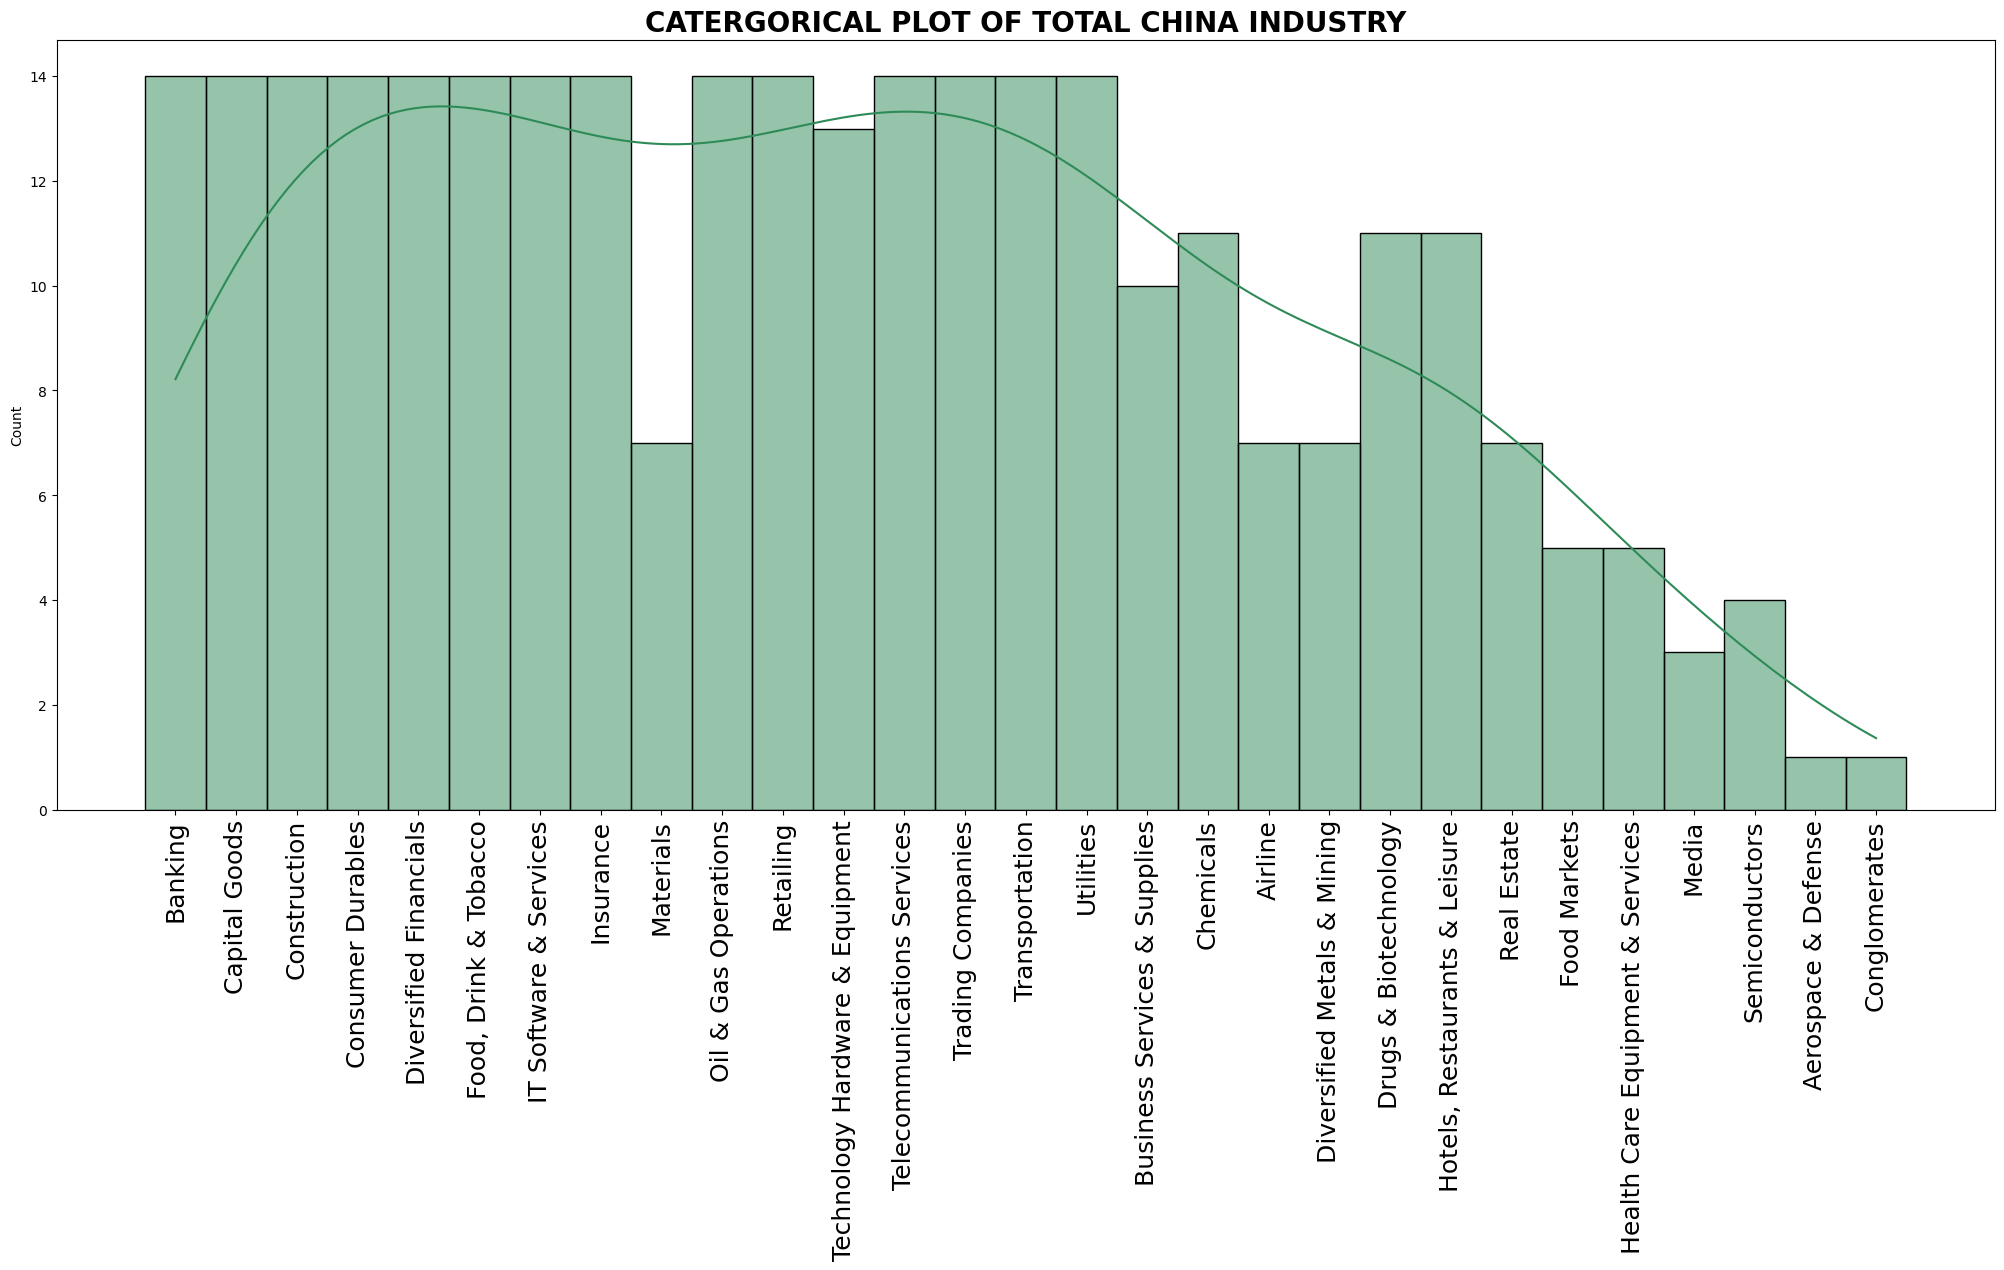

In [49]:
# CHINA Subset
# Set the figure size
plt.figure(figsize = (25,10))

# Use a histogram to visualize the distribution of the variables. 
hist_chn = sns.histplot(chn['Industry'], bins = 10, color = 'seagreen', kde = True)

# Adding annotations to the graph 
plt.xlabel('')
plt.xticks(fontsize = 18, rotation = 90)

# Set the figure size
plt.title('CATERGORICAL PLOT OF TOTAL CHINA INDUSTRY', fontsize = 20, fontweight = 'bold')

Text(0.5, 1.0, 'CATERGORICAL PLOT OF TOTAL JAPAN INDUSTRY')

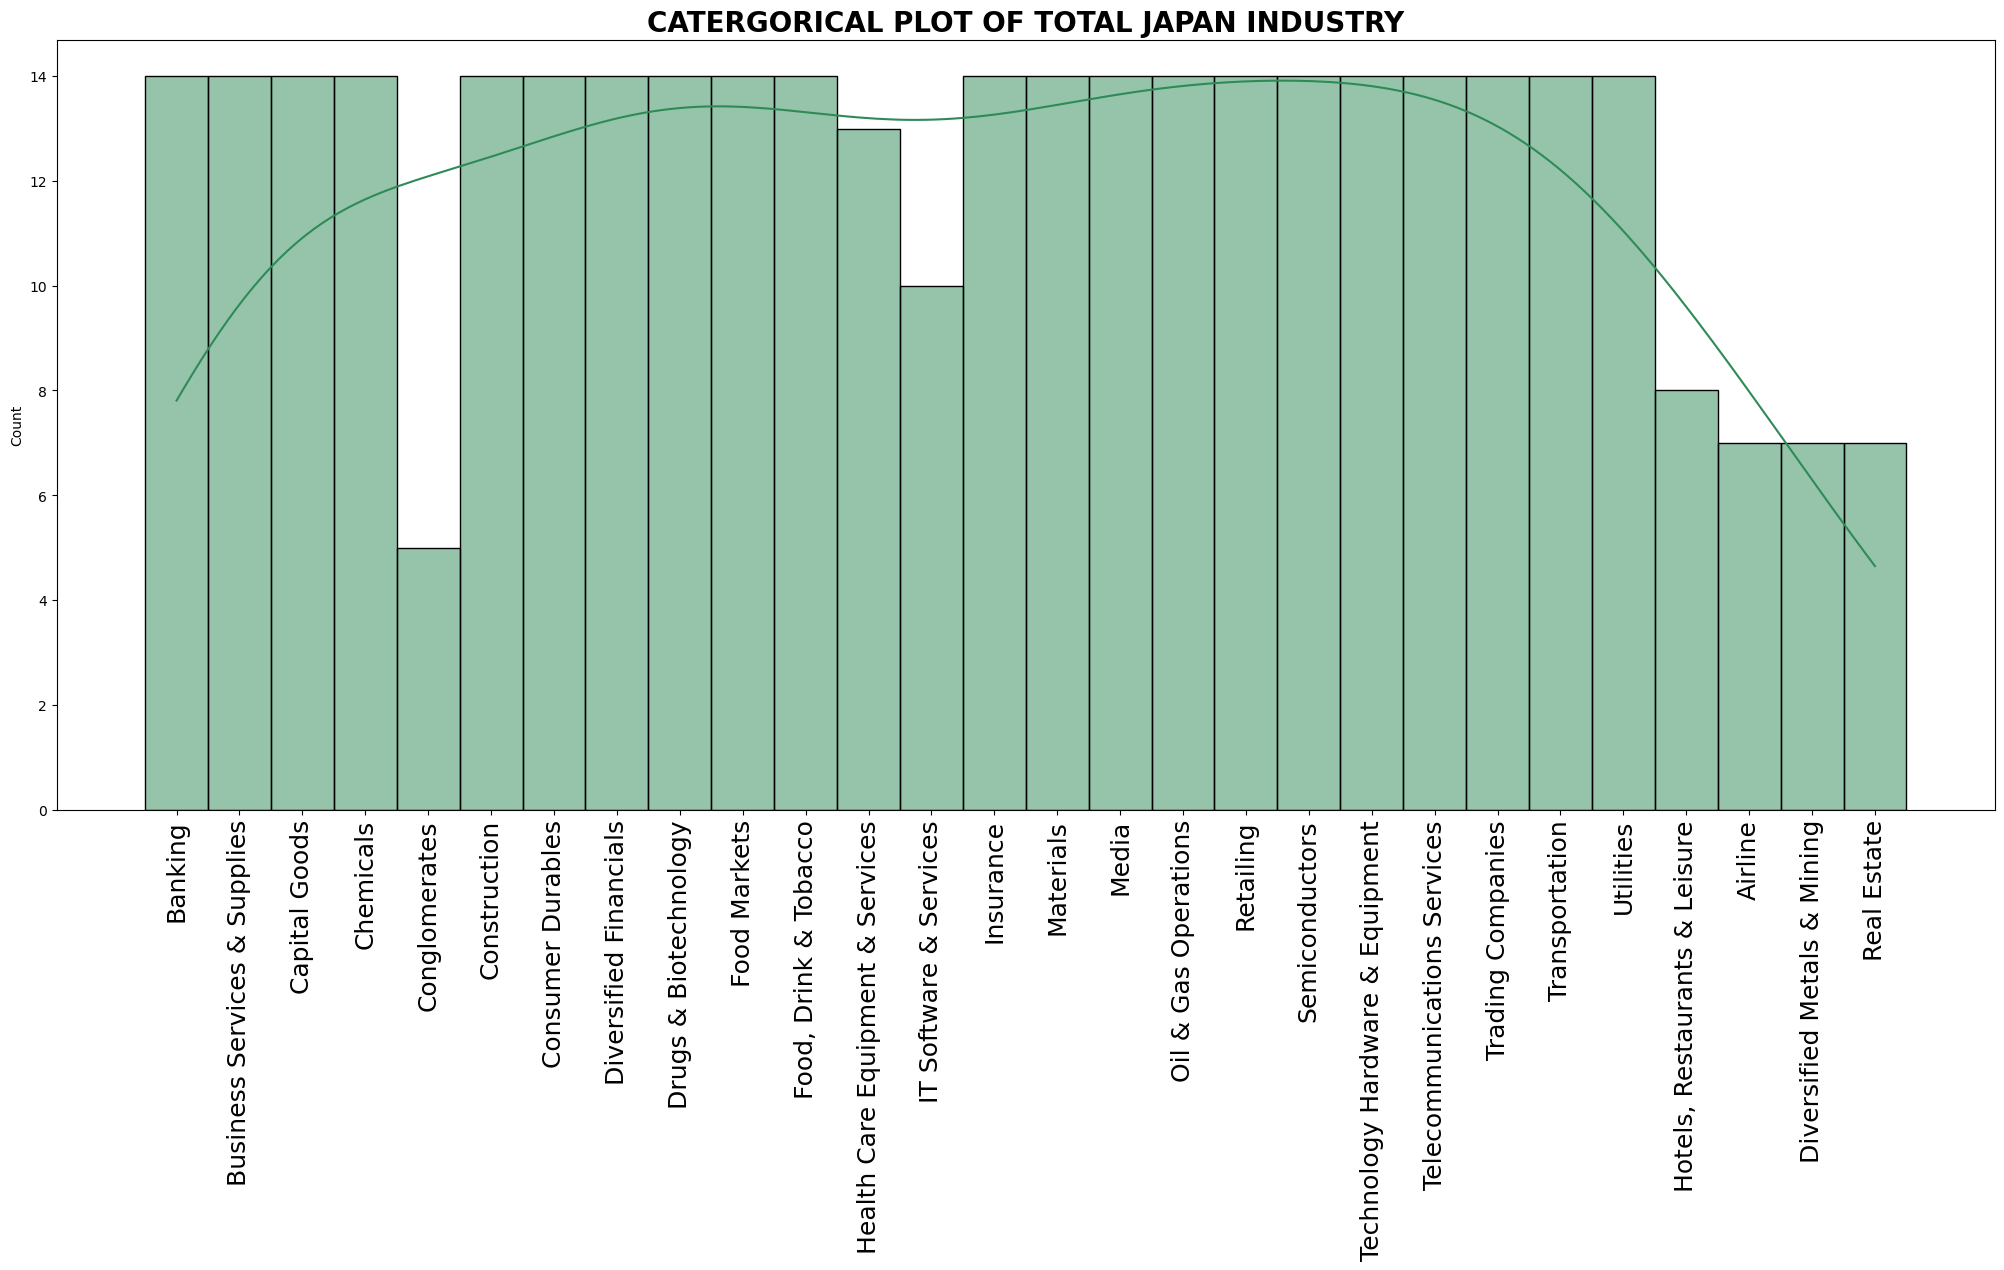

In [50]:
# JAPAN Subset
# Set the figure size
plt.figure(figsize = (25,10))

# Use a histogram to visualize the distribution of the variables. 
hist_jpn = sns.histplot(jpn['Industry'], bins = 10, color = 'seagreen', kde = True)

# Adding annotations to the graph 
plt.xlabel('')
plt.xticks(fontsize = 18, rotation = 90)

# Set the figure size
plt.title('CATERGORICAL PLOT OF TOTAL JAPAN INDUSTRY', fontsize = 20, fontweight = 'bold')

**OBESERVATION:** Clearly the categorical plot defines the types of industry present in each region and displaying notable differences in their density. 

Text(0.5, 1.0, 'CATERGORICAL PLOT OF GLOBAL PROFITS GROWTH BY INDUSTRY')

<Figure size 5000x1000 with 0 Axes>

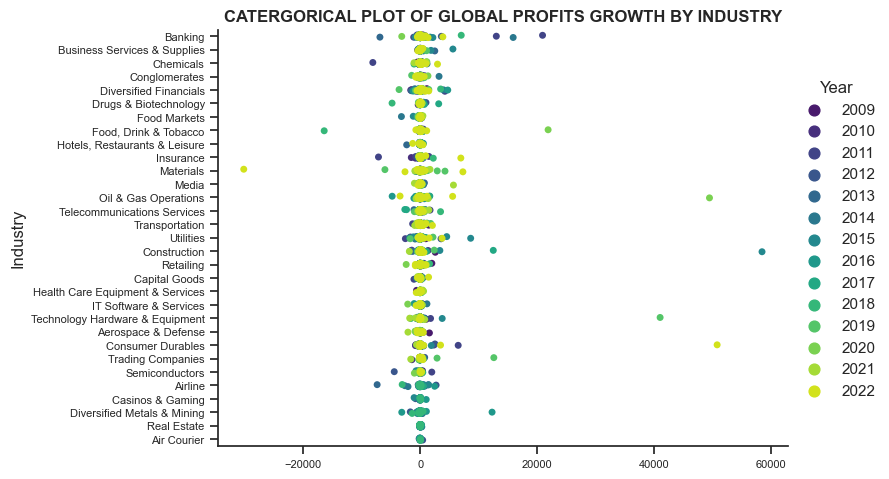

In [51]:
# Set the figure size
plt.figure(figsize = (50,10))

# Creating a Categorical plot
sns.set(style = 'ticks')
cp_glbl = sns.catplot(x = 'Profits Growth',  y = 'Industry', hue = 'Year', palette = 'viridis', aspect = 1.8, data = dfgwth)

# Adding annotations to the graph 
plt.xlabel('')
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title('CATERGORICAL PLOT OF GLOBAL PROFITS GROWTH BY INDUSTRY', fontweight = 'bold')

Text(0.5, 1.0, 'CATERGORICAL PLOT OF USA PROFITS BY INDUSTRY')

<Figure size 5000x1000 with 0 Axes>

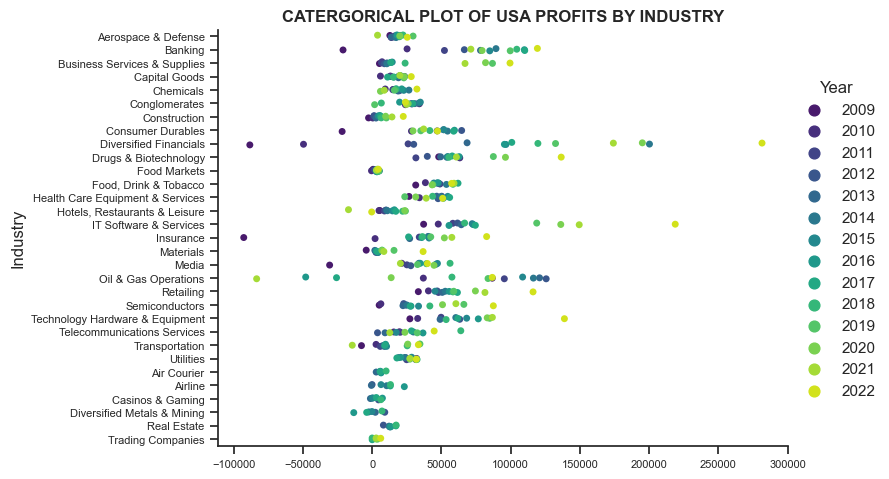

In [52]:
# Set the figure size
plt.figure(figsize = (50,10))

# Creating a Categorical plot
sns.set(style = 'ticks')
cp_usa = sns.catplot(x = 'Profits',  y = 'Industry', hue = 'Year', palette = 'viridis', aspect = 1.8, data = usa)

# Adding annotations to the graph 
plt.xlabel('')
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title('CATERGORICAL PLOT OF USA PROFITS BY INDUSTRY', fontweight = 'bold')

Text(0.5, 1.0, 'CATERGORICAL PLOT OF CHINA PROFITS BY INDUSTRY')

<Figure size 5000x1000 with 0 Axes>

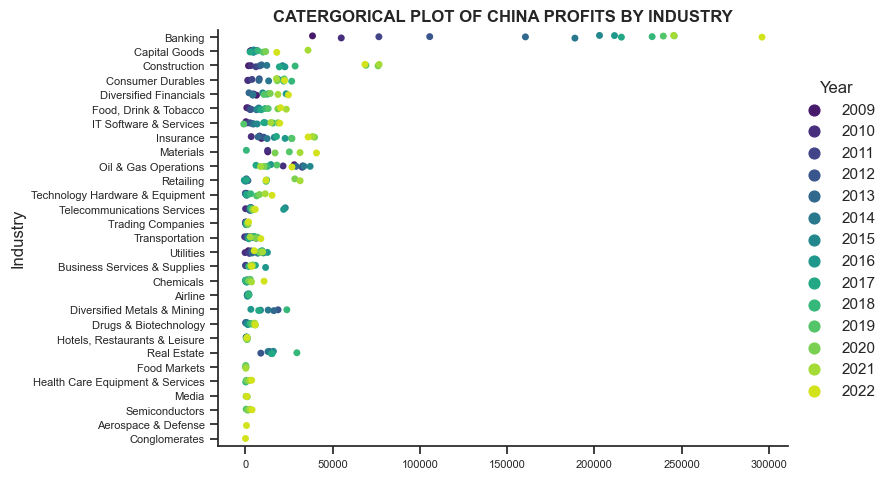

In [53]:
# Set the figure size
plt.figure(figsize = (50,10))

# Creating a Categorical plot
sns.set(style = 'ticks')
cp_chn = sns.catplot(x = 'Profits',  y = 'Industry', hue = 'Year', palette = 'viridis', aspect = 1.8, data = chn)

# Adding annotations to the graph 
plt.xlabel('')
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title('CATERGORICAL PLOT OF CHINA PROFITS BY INDUSTRY', fontweight = 'bold')

Text(0.5, 1.0, 'CATERGORICAL PLOT OF JAPAN PROFITS BY INDUSTRY')

<Figure size 5000x1000 with 0 Axes>

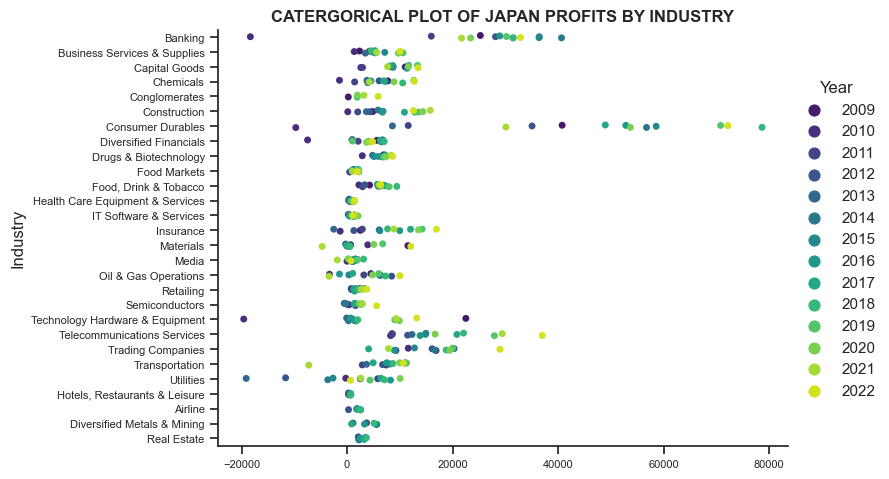

In [54]:
# Set the figure size
plt.figure(figsize = (50,10))

# Creating a Categorical plot
sns.set(style = 'ticks')
cp_jpn = sns.catplot(x = 'Profits',  y = 'Industry', hue = 'Year', palette = 'viridis', aspect = 1.8, data = jpn)

# Adding annotations to the graph 
plt.xlabel('')
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title('CATERGORICAL PLOT OF JAPAN PROFITS BY INDUSTRY', fontweight = 'bold')

**OBSERVATION:** The distribution appears to be unique for each region. What stands out in these charts are the remarkable growth rates in 2019 for both the Food, Drinks & Tobacco and Technology Hardware & Equipment industries, as well as the Oil & Gas Operations industry globally in 2020.

However, taking a closer look at the `absolute profits` of the three countries reveals a completely different outcome:

In the **USA**, the Consumer Durables, IT Software & Services, and Telecommunication industries had substantial earnings in 2022. In **China**, the Banking and Construction sectors showed high gains in 2021, while in **Japan**, the Telecommunication Services and Trading businesses made significant progress in 2022.

Recalling the year 2019, it is when COVID-19 was detected and began to spread in many regions. The number of infected cases continued to rise, severely affecting all countries in the subsequent years. Local governments implemented social distancing measures and business shutdowns to mitigate the spread. It is not surprising to see these industries thrive during these years because many households continued to rely on land travel, utilized the internet to stay connected (for distant learning and remote work), and healthcare systems were overwhelmed.

## QUESTIONS TO EXPLORE
** **

### a) Current Questions


**1. Which country(s) has the most top-performing companies? The least?**
 - **What is the industry-type density like for these regions?**
 
_It was observed in the previous notebook (6.1) that the three countries with the largest counts of top-performing companies are the USA, Japan, and China, respectively. The categorical plot (bar) displayed the list of industry types present in each region, showing multiple strong concentrations. However, the Banking business is the most prominent category globally._

**2. Which year has the highest growth? The lowest?**
 - **Is there a relationship between earnings (profit) and revenue (sales)?**
 
_The variables for the selected charts did not display the year-to-year comparison of growth performance; however, it appears that sales has a strong relationship with all four metrics, which will aid in further analysis.._


**3. Which industries made significant development? The least?**
 
 _There were multiple industries from several regions that made a striking progress._
 
`GROWTH RATE (BY INDUSTRY W/IN COUNTRY) in GLOBAL DATASET:`
 
 _**2019:**_ Food, Drinks & Tobacco _`and`_ Technology Hardware & Equipment industries
 
 _**2020:**_ Oil & Gas Operations

`ABSOLUTE EARNINGS (BY INDUSTRY W/IN COUNTRY):`
 
 _**2021:**_ Banking and Construction (in China)
 
 _**2022:**_ Consumer Durables, IT Software & Services, _`and`_ Telecommunication Services (in USA)
             & Telecommunication Services (in Japan)
             
_Another notable observation is that the Real Estate industry appears to have no records in the later years, assuming that this is caused by the pandemic. This may be because households were likely not looking into purchasing homes due to changes in working conditions (temporary business shutdowns, job losses, etc.)._

**4. How did most businesses perform before and during the pandemic?**
 - **Was there any significant difference?**
 - **Which industries were impacted the hardest? The least?**
 
_It appears that certain industries (without specific company names yet) show differences each year. While it is not quite clear which companies performed the best or the least at this stage, it is evident that there are businesses that may not have shown positive progress. Further analysis will be needed to identify the leading companies and uncover industries that have made significant year-to-year developments._

### b) New Questions to Explore

1. How are industries alike performing in different countries?
    - Is their progress the same or different?

### c) Hypotheses

1. An increase in revenue will result in a corresponding increase in profit.


2. The industries performances has no significant difference before and during pandemic.
   - Assets measures the increase in the total value of assets owned by a company or industry, assuming the expansion of productive capacity and investment in physical resources. Referencing stockopedia: https://www.stockopedia.com/ratios/asset-growth-ttm-5122/

_**NOTE:** The correlation analysis measures linear relationships of the variables but may not fully capture its complex or nonlinear relationships. It it is important to note, that other factors outside the dataset may possibly contribute in depicting the success trends of the organizations._

## EXPORTING FILES & VISUALIZATION CHARTS 
** **

In [55]:
# EXPORTING VISUALIZATION CHARTS

# Correlation Heatmap 
glbl_hm2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'HeatmapGLOBAL.png'))
usa_hm2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'HeatmapUSA.png'))
chn_hm2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'HeatmapCHN.png'))
jpn_hm2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'HeatmapJPN.png'))

# Scatterplot 
glbl_sp.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ScatterplotGLOBAL.png'))
usa_sp.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ScatterplotUSA.png'))
chn_sp.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ScatterplotCHN.png'))
jpn_sp.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ScatterplotJPN.png'))

# Pair Plots
glbl_pp.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'PairPlotsGLOBAL.png'))
usa_pp.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'PairPlotsUSA.png'))
chn_pp.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'PairPlotsCHN.png'))
jpn_pp.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'PairPlotsJPN.png'))

# Histogram 
hist_glbl.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'HistogramGLOBAL.png'))
hist_usa.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'HistogramUSA.png'))
hist_chn.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'HistogramCHN.png'))
hist_jpn.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'HistogramJPN.png'))

# Creating a Categorical plot
cp_glbl.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'CP GLOBAL.png'))
cp_usa.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'CP USA.png'))
cp_chn.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'CP CHN.png'))
cp_jpn.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'CP JPN.png'))